# Instrument Response

- As you know from our ObsPy and EDA analysis tutorials, we can plot earthquake wave or noise which can be caused by some human activites or climatic effects such as storm. Also, ocean current is another factor that affects the noise level. And, we can remove these noise by using filters like lowpass, highpass or bandpass. If you are more interested in the filters you can play with my filters tutorial(https://colab.research.google.com/drive/1nwxNxnpxaRP3l2THt_iCfxy7i8M5T6q5?usp=sharing)


- But now, we will remove the instrument response. If you did not miss Mete's presentation, you would remember it. But let us explain with just a sentence. It is the mapping between the incoming photon flux and the detected events.


#### Why do we need removing instrument response?
- The seismic sensor is not recording the desired ground motion magnitude:displacement,velocity, or acceleration and a transformation must be done.The response of the seismic sensor to the ground  motion,as well as the response of the recorder,is in general frequency dependent, so we make a frequency-dependent correction. We do this correction by using remove_response() function. 


- The Units that are used in the graphics are meter for distance, and second for time. (Displacement graphics show in meter, Velocity graphics show in meter/second, Acceleration graphics show in meter/ second^2 )


- In this tutorial, we will show the filtered waveform which is removed with instrument response by using metadata file(xml).


- And, we will choose two stations and apply these process. Then, compare them. In the end, you will notice that these two waveforms are very similar. Maybe, it is not so clear, but we will understand it by the fallowing examples easily.


## Parts
### I. Raw Data
### II. Filtering Data
### III. Removing Instrument Response 
### IV. Overall Graphics
### V. Examples

In [5]:
from __future__ import print_function
import obspy
from obspy import read, read_inventory, UTCDateTime
import matplotlib.pyplot as plt
import numpy as np
from math import log10
from obspy.geodetics import gps2dist_azimuth
#from obspy.taup import TauPyModel

## Elazığ Earthquake, 24/01/2020
- Start time: 24 Ocak 2020 ÖS 8:55 GMT+3 
- Time: 40s
- Magnitude: 6.8 Mw (Kandilli)

#### I. Raw Data 

#### - Ezc_st 's data is taken from the station in Erzincan,Ilıç (KO.ILIC)

In [2]:
# simply use the included example waveform
Ezc_st=read(r'C:\Users\sukru\OneDrive\Desktop\Workspace\EarthML\data\erz.mseed')
Ezc_tr=Ezc_st.select(component="Z")[0]
# the corresponding response is included in ObsPy as a StationXML file
Ezc_inv= read_inventory(r"C:\Users\sukru\OneDrive\Desktop\Workspace\EarthML\data\erz_inv.xml")
print(Ezc_tr.stats)

         network: KO
         station: ILIC
        location: 
         channel: BHZ
       starttime: 2020-01-24T17:54:55.820000Z
         endtime: 2020-01-24T17:59:02.920000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 12356
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 89, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 139264})


- **Lets find the distance between KO.ILIC and the earthquake**

In [208]:
model = TauPyModel(model="iasp91")
arrivals = model.get_travel_times(source_depth_in_km=129
                                  ,distance_in_degree=1.151)
print(arrivals)
#d = (tS-tP/(1/vS-1/vP)
# (1/vS-1/vP) = 8 km/s
#tS= 43.069  seconds
#tP= 24.264 seconds
d=(43.069-24.264)*8
print("the distance between KO.ILIC and the earthquake:",d,"km")

16 arrivals
	p phase arrival at 24.264 seconds
	s phase arrival at 43.069 seconds
	PcP phase arrival at 493.894 seconds
	ScP phase arrival at 692.595 seconds
	PcS phase arrival at 706.061 seconds
	ScS phase arrival at 904.778 seconds
	PKiKP phase arrival at 977.145 seconds
	pPKiKP phase arrival at 1012.021 seconds
	sPKiKP phase arrival at 1025.487 seconds
	SKiKP phase arrival at 1175.828 seconds
	PKIKKIKP phase arrival at 1895.450 seconds
	SKIKKIKP phase arrival at 2094.132 seconds
	PKIKKIKS phase arrival at 2107.599 seconds
	SKIKKIKS phase arrival at 2306.281 seconds
	PKIKPPKIKP phase arrival at 2406.712 seconds
	SKIKSSKIKS phase arrival at 3241.843 seconds
the distance between KO.ILIC and the earthquake: 150.44000000000003 km


- You can use Pythagorean theorem or this link to find distance_in_degree: https://www.uwrf.edu/PES/Geology/EDPTT_Calculator.cfm
- You can access source_depth_in_km from this link(only for Kandilli connected stations): http://www.koeri.boun.edu.tr/sismo/2/seismic-network/seismic-station-list/

Raw Data:


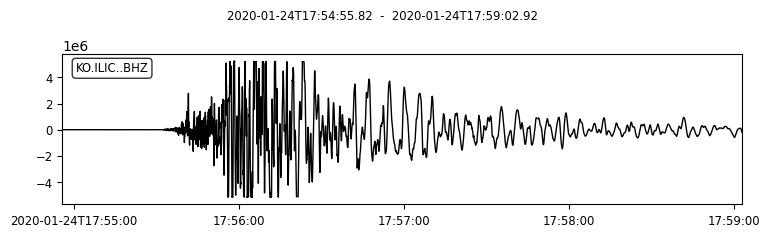

In [3]:
Ezc_starttime = UTCDateTime("2020-01-24T17:55:00.820000Z")
Ezc_endtime = UTCDateTime("2020-01-24T17:57:00.820000Z")
print("Raw Data:")
Ezc_tr.plot()
plt.show()

- Bg_st 's data is taken from the station in Bingöl,Karlıova (KO.KARO)

In [97]:
Bg_st=read("/Users/zeynepodabass/Downloads/bingöl_24jan.mseed")
Bg_tr=Bg_st.select(component="Z")[3]
Bg_inv=read_inventory("/Users/zeynepodabass/Downloads/bingöl_24jan_0.xml")
print(Bg_tr)

KO.KARO..HHZ | 2020-01-24T17:42:57.000000Z - 2020-01-24T17:57:25.990000Z | 100.0 Hz, 86900 samples


- **Lets find the distance between KO.KARO and the earthquake**

In [205]:
model = TauPyModel(model="iasp91")
arrivals = model.get_travel_times(source_depth_in_km=182
                                  ,distance_in_degree=1.780)
print(arrivals)
#d = (tS-tP/(1/vS-1/vP)
#(1/vS-1/vP) = 8 km/s
#tS= 62.212 seconds
#tP= 34.858 seconds
d=(62.212 -34.858)*8
print("the distance between KO.KARO and the earthquake:",d,"km")

16 arrivals
	p phase arrival at 34.858 seconds
	s phase arrival at 62.212 seconds
	PcP phase arrival at 487.479 seconds
	ScP phase arrival at 680.951 seconds
	PcS phase arrival at 699.674 seconds
	ScS phase arrival at 893.185 seconds
	PKiKP phase arrival at 970.661 seconds
	pPKiKP phase arrival at 1018.546 seconds
	sPKiKP phase arrival at 1037.267 seconds
	SKiKP phase arrival at 1164.090 seconds
	PKIKKIKP phase arrival at 1888.924 seconds
	SKIKKIKP phase arrival at 2082.353 seconds
	PKIKKIKS phase arrival at 2101.074 seconds
	SKIKKIKS phase arrival at 2294.503 seconds
	PKIKPPKIKP phase arrival at 2400.181 seconds
	SKIKSSKIKS phase arrival at 3230.063 seconds
the distance between KO.KARO and the earthquake: 218.83200000000005 km


Raw Data:


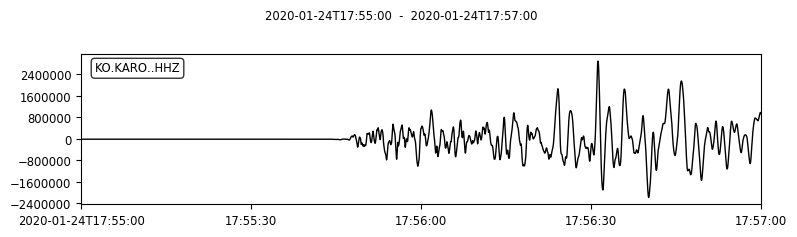

In [95]:
Bg_starttime = obspy.UTCDateTime("2020-01-24T17:55:00")
Bg_endtime = obspy.UTCDateTime("2020-01-24T17:57:00")
print("Raw Data:")
Bg_tr.plot(starttime= Bg_starttime, endtime=Bg_endtime)
plt.show()

- **Inventory of data from KO.ILIC**

In [6]:
#Lets read the inventory
Ezc_inv

Inventory created at 2024-08-20T16:30:19.091542Z
	Sending institution: SeisComP (KOERI)
	Contains:
		Networks (1):
			KO
		Stations (1):
			KO.ILIC (Ilic, Erzincan, Turkiye)
		Channels (3):
			KO.ILIC..BHZ, KO.ILIC..BHN, KO.ILIC..BHE

In [7]:
#Lets have a look at the details of the response information of this channel:
#inv['network#']['station#']['channel#']
Ezc_inv[0][0][0].response

Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS ()
	Overall Sensitivity: 1.84075e+09 defined at 1.000 Hz
	10 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 5918
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 311042
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 7: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 8: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 9: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 10: FIRResponseStage from COUNTS to COUNTS, gain: 1

- Here we see that it consists of multiple stages that convert from one unit to another. The final instrument response is the multipication (in the frequency domain) of all of these.


- The instrument response describes how incoming data transformed into what is finally stored in a file. Restoring original ground motion requires the inversion of that process. The deconvolution of the instrument response as written for example in a StationXML file will convert data back to its original units.

- **We show the instrument response of KO.ILIC station**

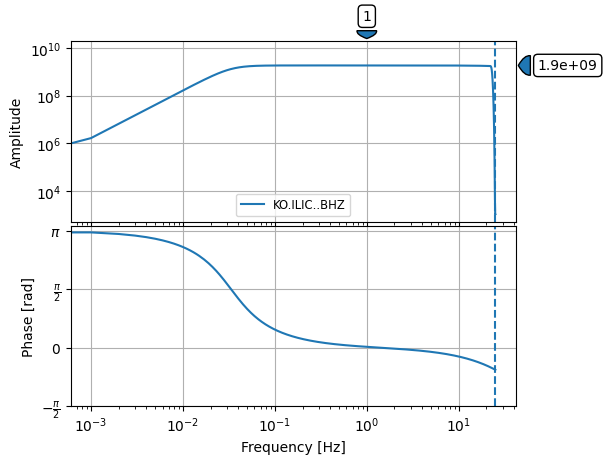

In [8]:
Ezc_inv.plot_response(min_freq=0.001,channel="BHZ")
plt.show()

 - These are Bode plots and show the amplitude  𝐴(𝜔) and the phase  𝜙(𝜔) response where 𝐼(𝜔)=𝐴(𝜔)^𝑒𝑖𝜙(𝜔) 
 
 
 - Modern seismometers usually record the velocity of ground motion . (As. we see above) Strong motions' sensor record acceleration.
 
 
 - The min_freq argument determines the lowest plotted frequency, the maximum plotted frequency is always the Nyquist frequency. (Not: Nyquist frequency is defined as 𝑓𝑁𝑦𝑞=1/(2Δ𝑡))


Displacement


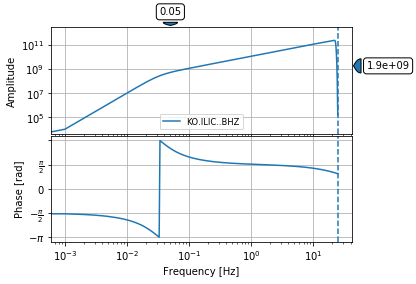

Velocity


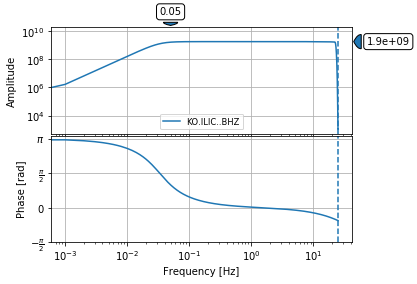

Acceleration


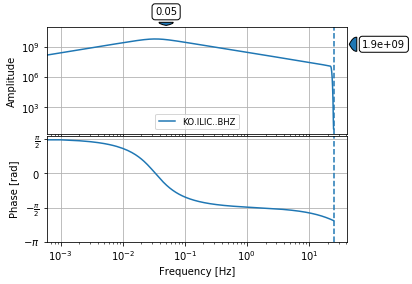

In [47]:
print("Displacement")
Ezc_inv.plot_response(0.001,channel="BHZ", output="DISP")
print("Velocity")
Ezc_inv.plot_response(0.001,channel="BHZ", output="VEL")
print("Acceleration")
Ezc_inv.plot_response(0.001,channel="BHZ", output="ACC")
plt.show()

- D to V to A the slope decreases

- **Inventory of data from KO.KARO** 

In [48]:
Bg_inv

Inventory created at 2020-07-21T21:21:57.229766Z
	Sending institution: SeisComP (KOERI)
	Contains:
		Networks (1):
			KO
		Stations (1):
			KO.KARO (Karliova-BINGOL)
		Channels (3):
			KO.KARO..HHZ, KO.KARO..HHN, KO.KARO..HHE

In [49]:
#inv['KO#']['KARO#']['HHZ#']
Bg_inv[0][0][0].response

Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 4.66387e+08 defined at 0.050 Hz
	11 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1490
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 308356
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 7: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 8: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 9: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 10: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 11: FIRResponseStage from COUNTS to COUNTS, gain: 1

- **We show the instrument response of KO.KARO station**

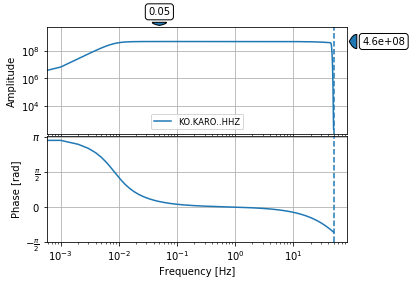

In [50]:
Bg_inv.plot_response(min_freq=0.001, channel="HHZ")
plt.show()

Displacement


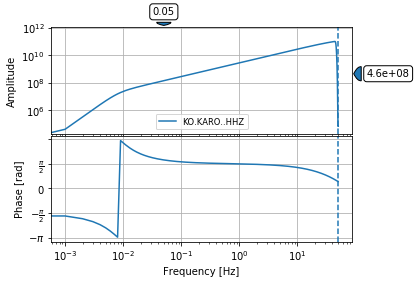

Velocity


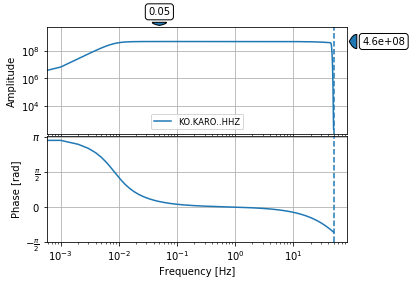

Acceleration


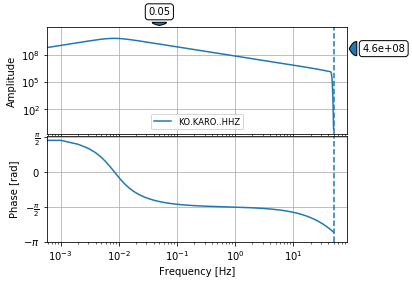

In [51]:
print("Displacement")
Bg_inv.plot_response(0.001,channel="HHZ", output="DISP")
print("Velocity")
Bg_inv.plot_response(0.001,channel="HHZ", output="VEL")
print("Acceleration")
Bg_inv.plot_response(0.001,channel="HHZ", output="ACC")
plt.show()

## II. Filtering Data
- We define a filter band to prevent amplifying noise during the deconvolution and show what the main arrival looks like at bandpass 2-200s without the instrument deconvolution. We choose our filters in the frequency domain of our data. 


- We need to adjust the last sample amplitude to the same value as the first one, traditionally to zero because of the discontinuity(phase shift).This is what the taper does: decreasing the first and last few samples gradually to zero. 


- For more information about tapering functions please visit: https://en.wikipedia.org/wiki/Window_function#Hann_and_Hamming_windows

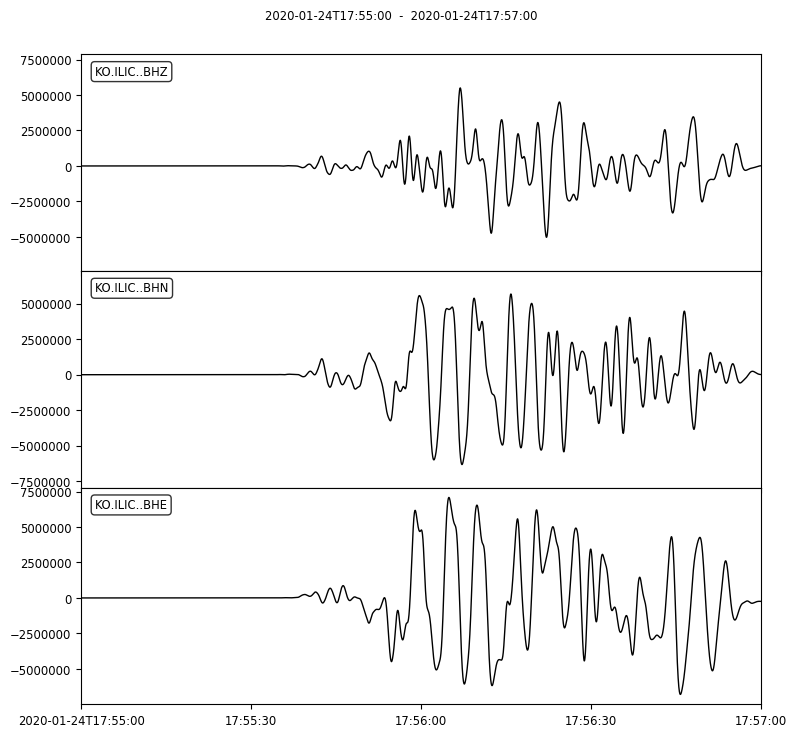

In [169]:
#Filtering Data from the given data(KO.ILIC) 
Ezc_st.slice(starttime=Ezc_starttime,endtime=Ezc_endtime).copy().taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

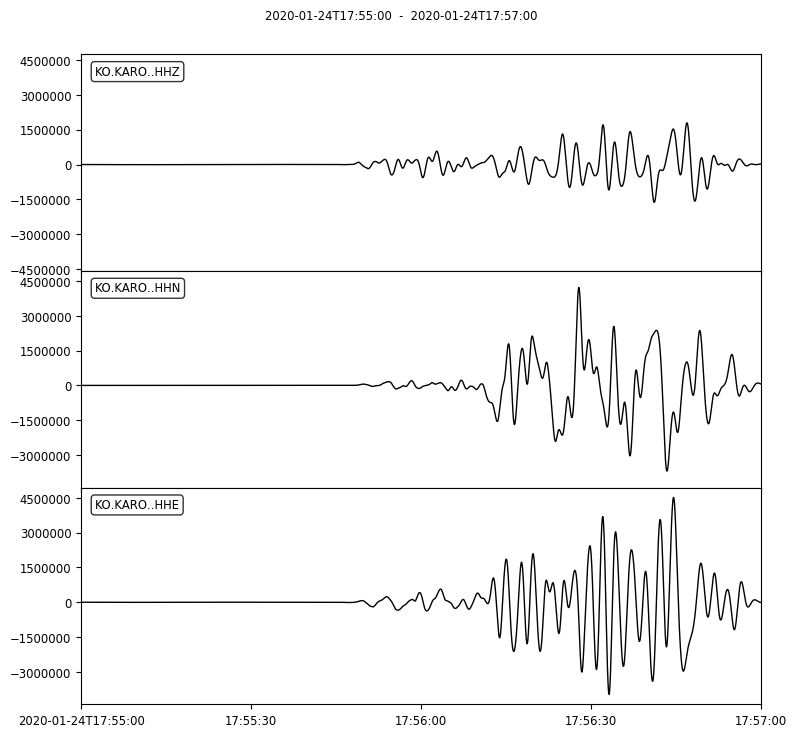

In [168]:
#Filtering Data from the given data (KO.KARO)
Bg_st.slice(starttime=Bg_starttime,endtime=Bg_endtime).copy().taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

## III. Removing Instrument Response 

- We will now show what the main arrival looks like at bandpass 2-200s with the instrument deconvolution.

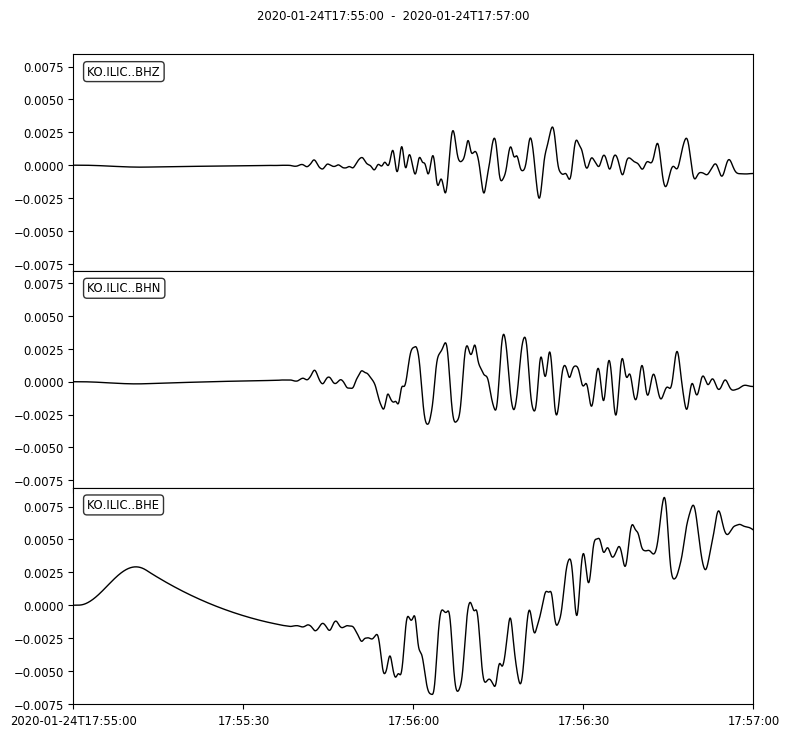

In [166]:
# Removing Instrument Response from the given data (KO.ILIC)
Ezc_st.slice(starttime=Ezc_starttime,endtime=Ezc_endtime).copy().remove_response(
    inventory=Ezc_inv, output="VEL").taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

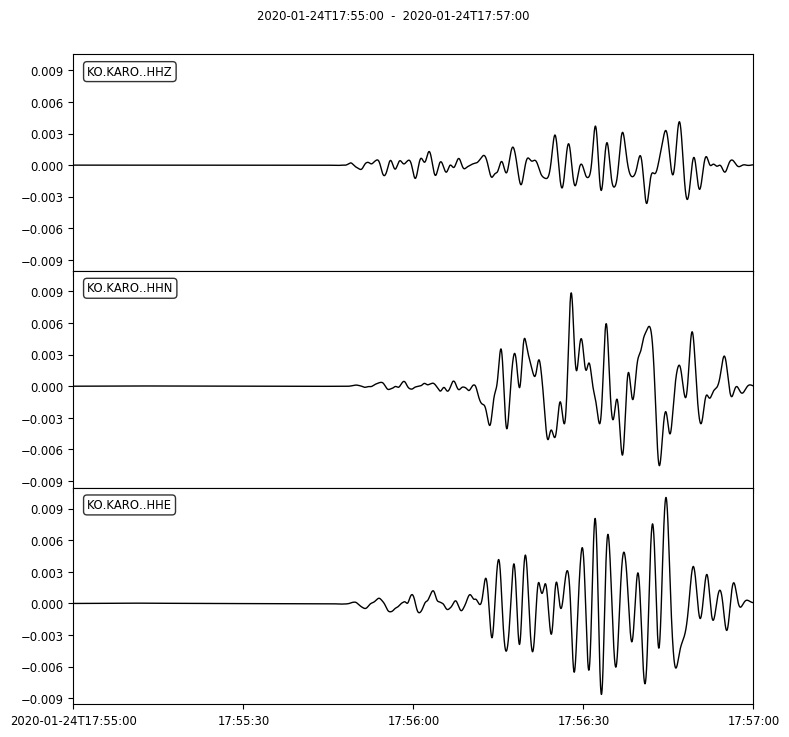

In [167]:
# Removing Instrument Response from the given data (KO.KARO)
Bg_st.slice(starttime=Bg_starttime,endtime=Bg_endtime).copy().remove_response(
    inventory=Bg_inv, output="VEL").taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

## IV. Overall Graphics 

#### Note that there are two ways to prevent overamplification while convolving the inverted instrument spectrum: 
- One possibility is to specify a water level which represents a clipping of the inverse spectrum and limits amplification to a certain maximum cut-off value (water_level in dB). 


- The other possibility is to taper the waveform data in the frequency domain prior to multiplying with the inverse spectrum, i.e. perform a pre-filtering in the frequency domain (specifying the four corner frequencies of the frequency taper as a tuple in pre_filt).


- What does the taper? 

    Real data usually do not end with the same sample amplitude as they start with. Latest when cutting the data, this is the case. When converting the data into the frequency-domain, we thus have a discontinuity which produces a Gibb's effect. It also makes problems when filtering the data afterwards. Therefore, we need to adjust the last sample amplitude to the same value as the first one, traditionally to zero.This is what the taper does: decreasing the first and last few samples gradually to zero. The taper is a kind of window function applied in the time domain, i.e. just multiplied to the data sample by sample.

- **pre_filt()**: We apply a bandpass filter in frequency domain to the data before deconvolution. The list or tuple defines the four corner frequencies (f1, f2, f3, f4) of a cosine taper which is one between f2 and f3 and tapers to zero for f1 < f < f2 and f3 < f < f4.

In [57]:
# Define frequency domains of datas 

freqs = np.fft.rfftfreq(Ezc_tr.stats.npts, d=Ezc_tr.stats.delta)
print(freqs)
print("Frequency domain for Ezc_tr data is between",min(freqs),"and",max(freqs),"\n")

freqs = np.fft.rfftfreq(Bg_tr.stats.npts, d=Bg_tr.stats.delta)
print(freqs)
print("Frequency domain for Bg_tr data is between",min(freqs),"and",max(freqs))

[  0.00000000e+00   5.54059595e-04   1.10811919e-03 ...,   2.49986149e+01
   2.49991689e+01   2.49997230e+01]
Frequency domain for Ezc_tr data is between 0.0 and 24.9997229702 

[  0.00000000e+00   9.57340890e-04   1.91468178e-03 ...,   4.99980853e+01
   4.99990427e+01   5.00000000e+01]
Frequency domain for Bg_tr data is between 0.0 and 50.0


In [58]:
# Define a filter band to prevent amplifying noise during the deconvolution
# We choose our filters from frequency domains of our datas. 
# Also we define f2 and f3 up to our taper fraction which equals to 0.05 .

pre_filt = (0.001, 0.005, 10.0, 20.0)

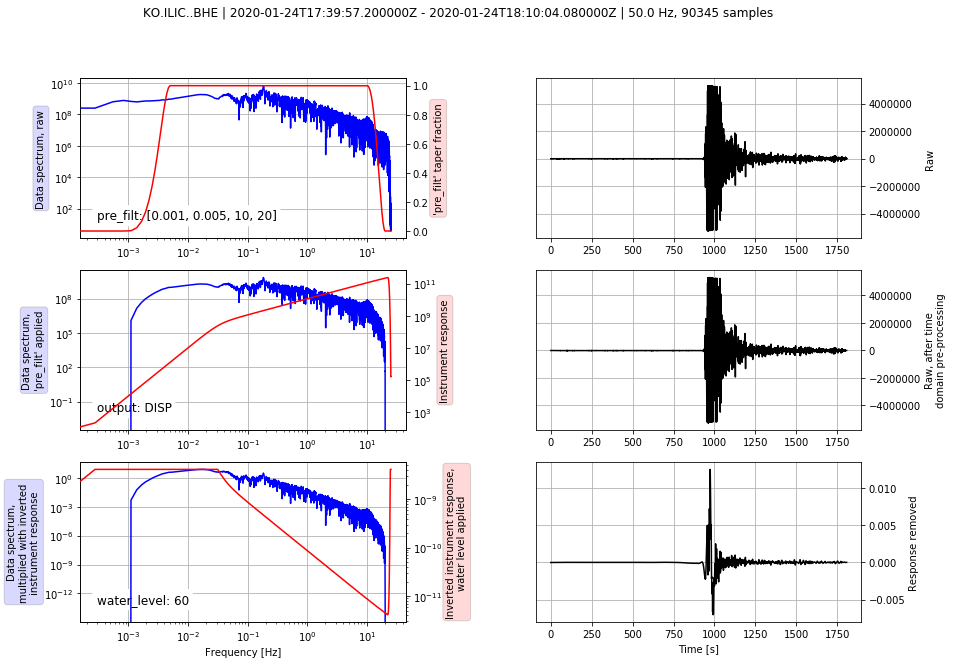

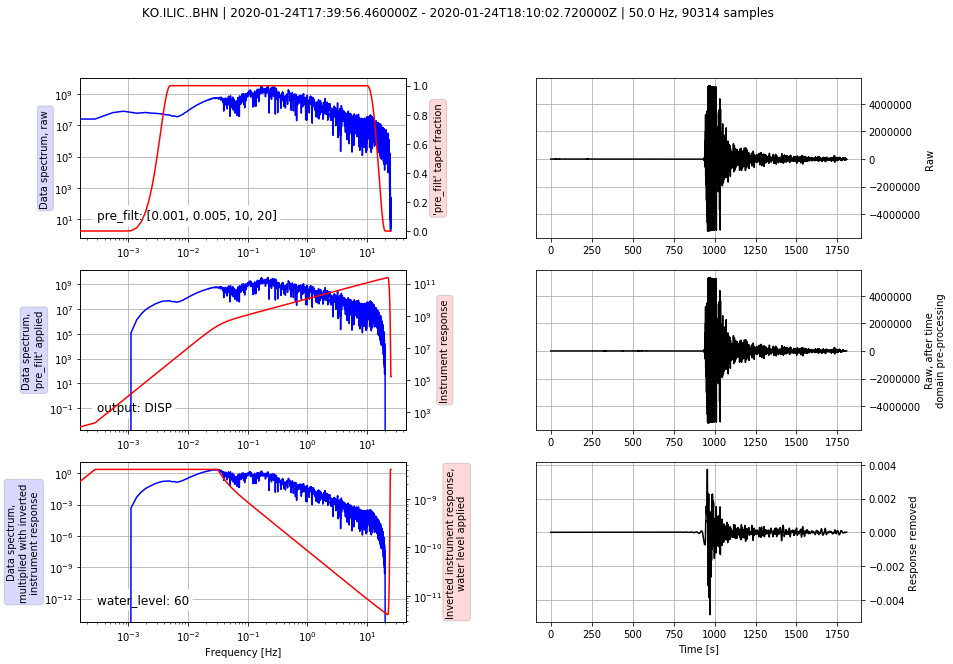

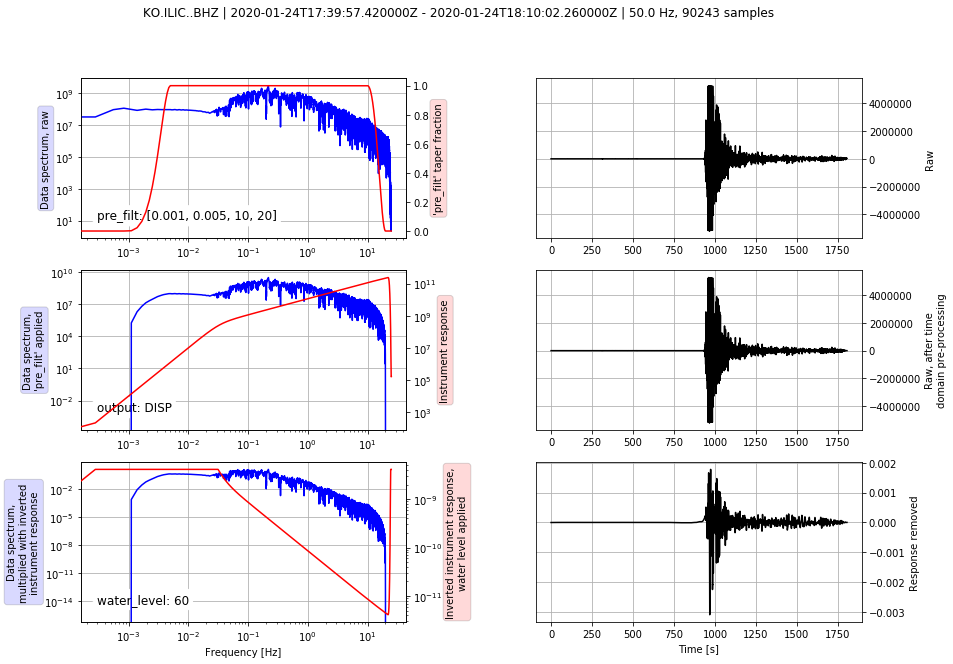

In [59]:
# Remove instrument response using the information from the given data (KO.ILIC).Component "Z" is from the channal BH"Z"
Ezc_tr = Ezc_st.select().copy().remove_response(
    inventory=Ezc_inv,output="DISP",pre_filt=pre_filt,taper=True, 
    taper_fraction=0.05, water_level=60, plot=True)[0]

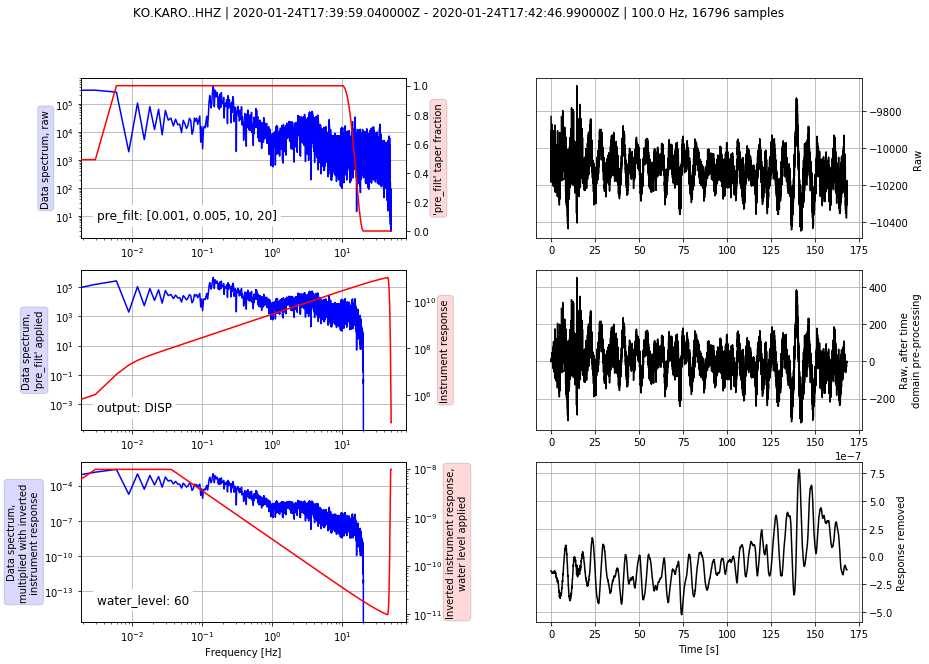

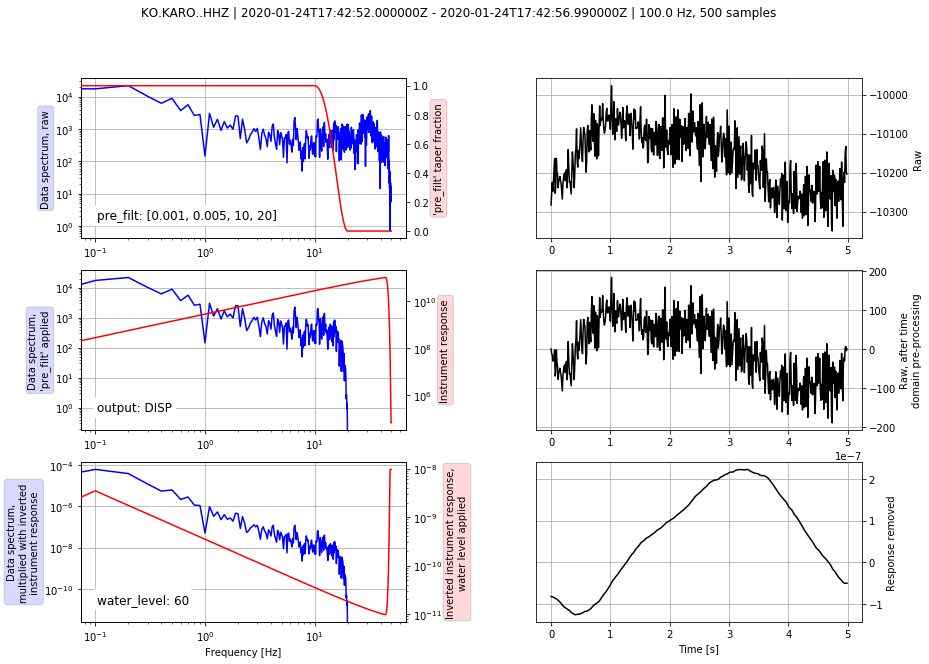

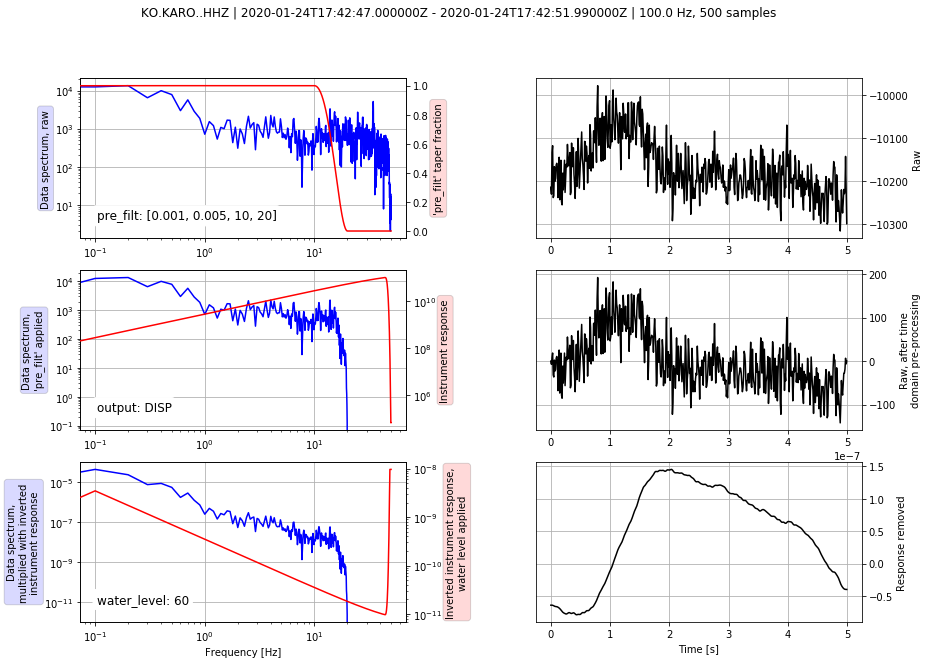

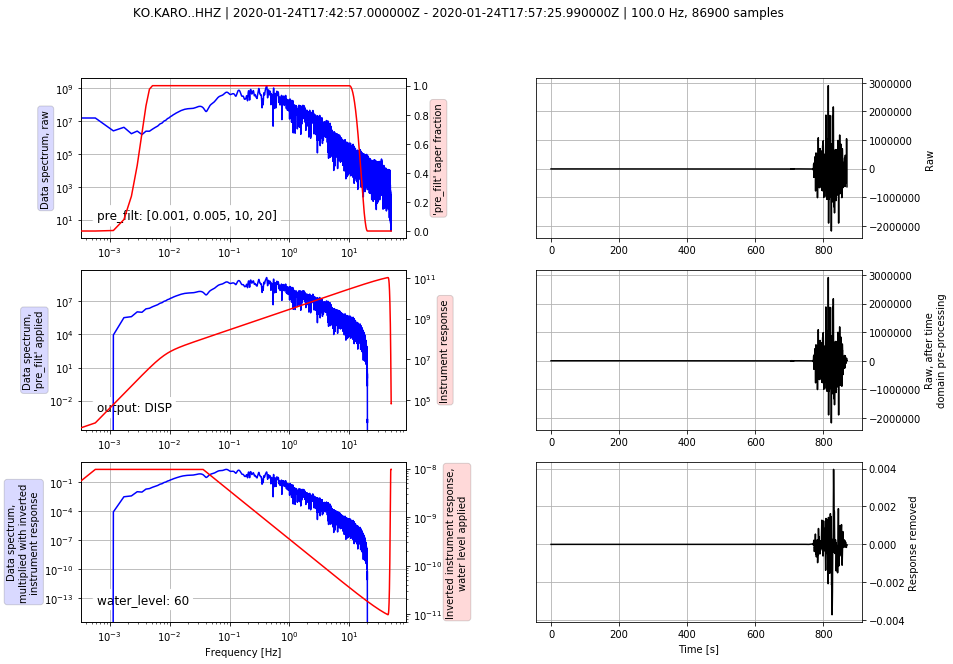

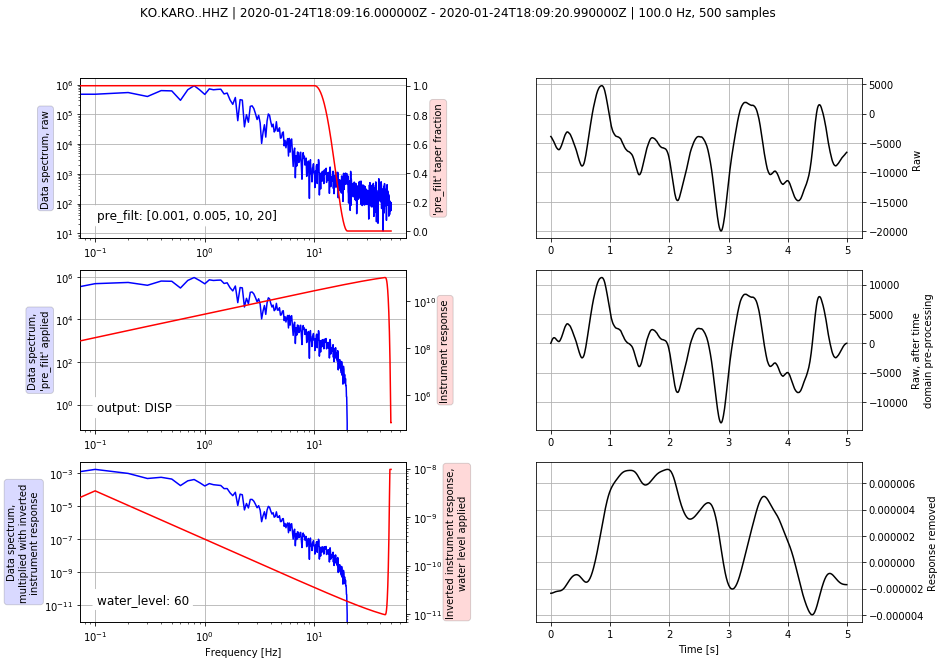

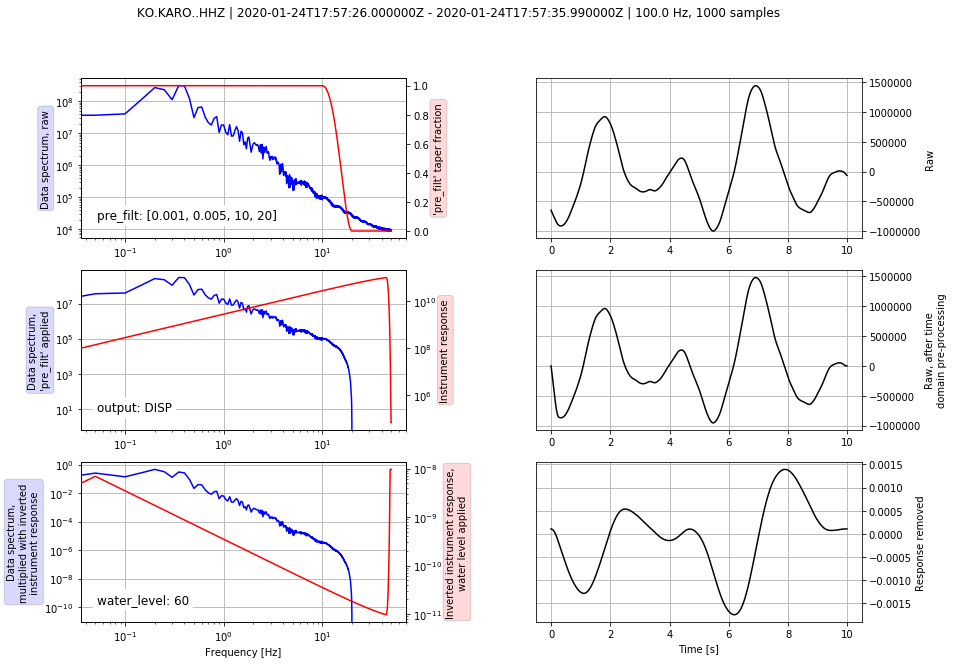

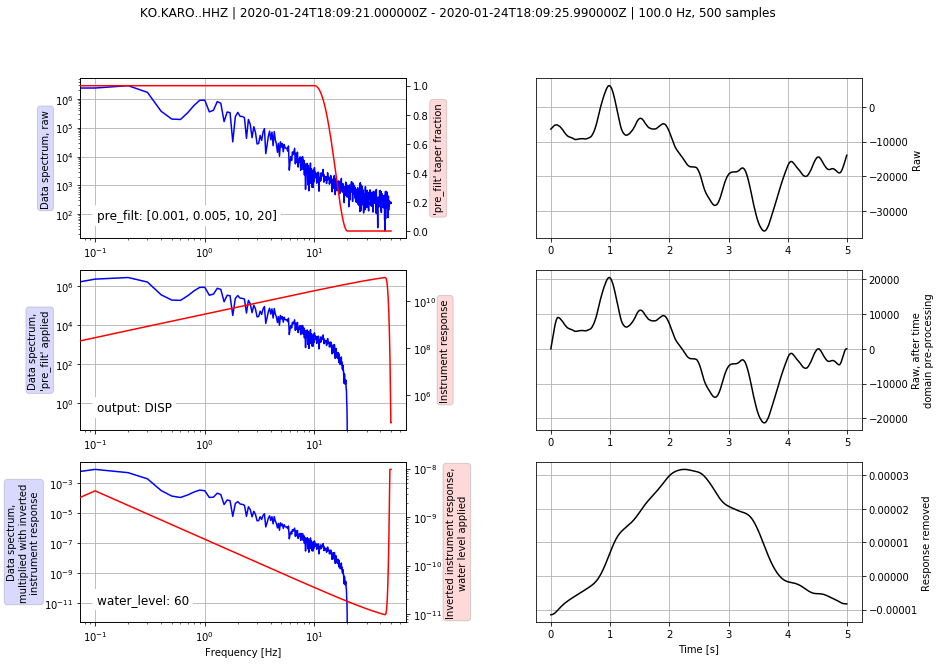

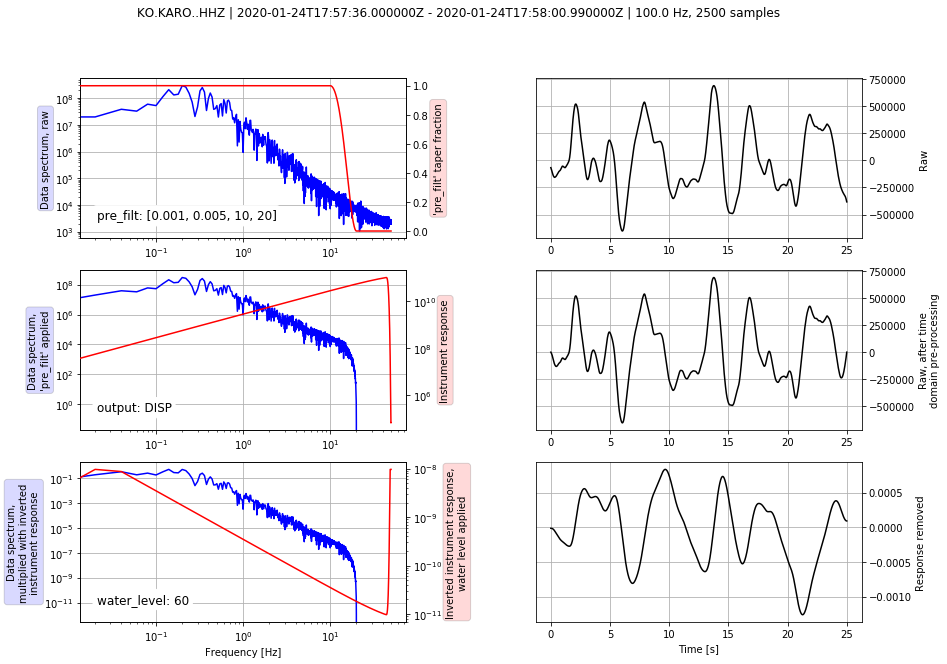

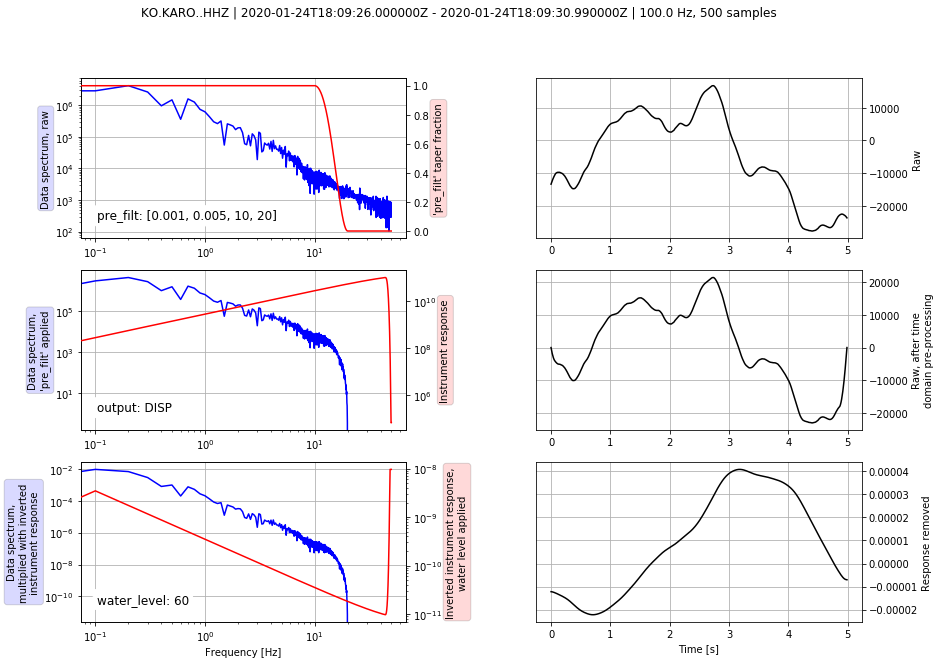

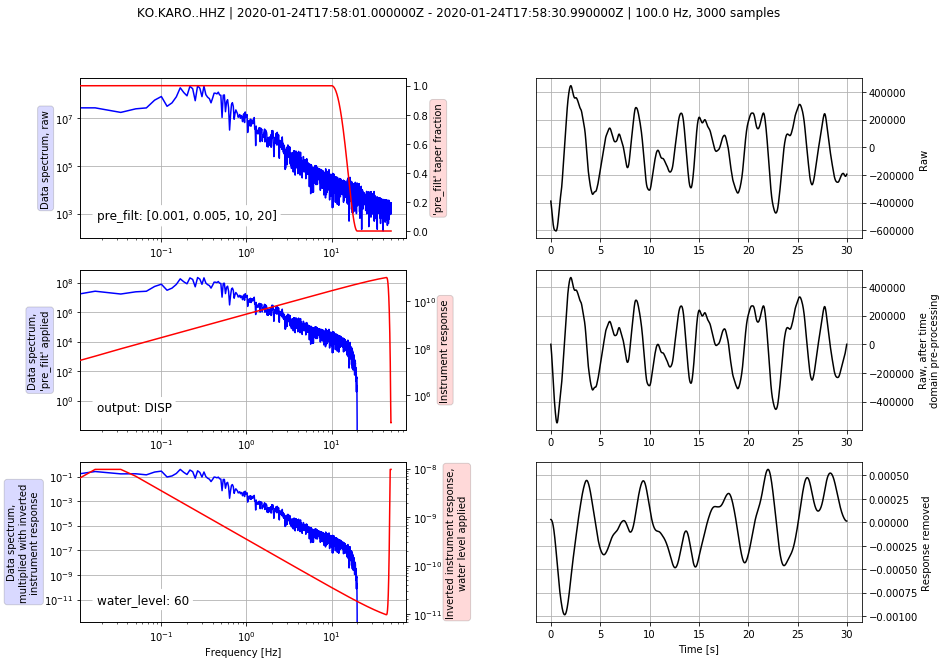

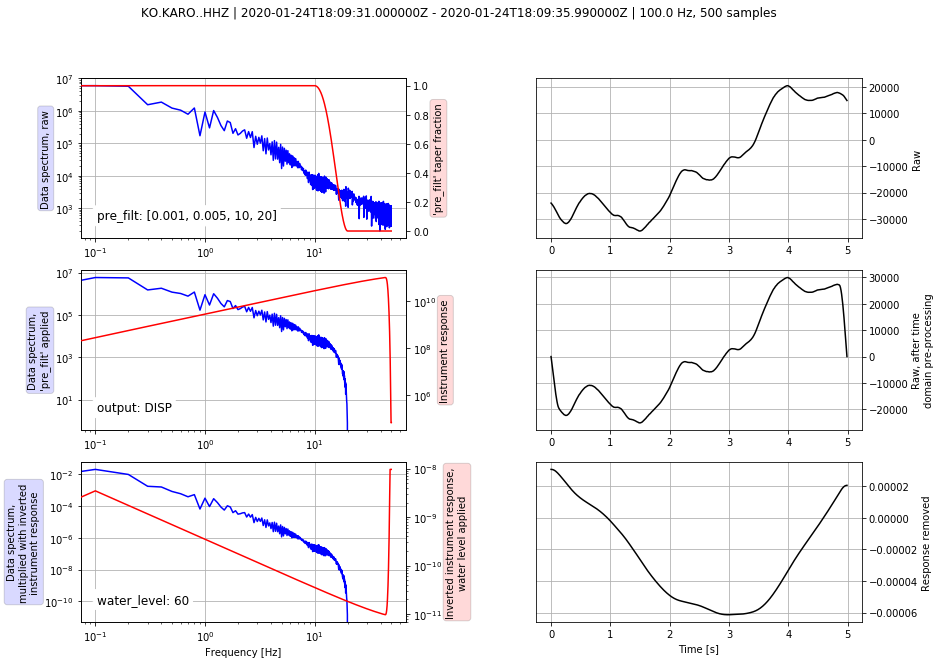

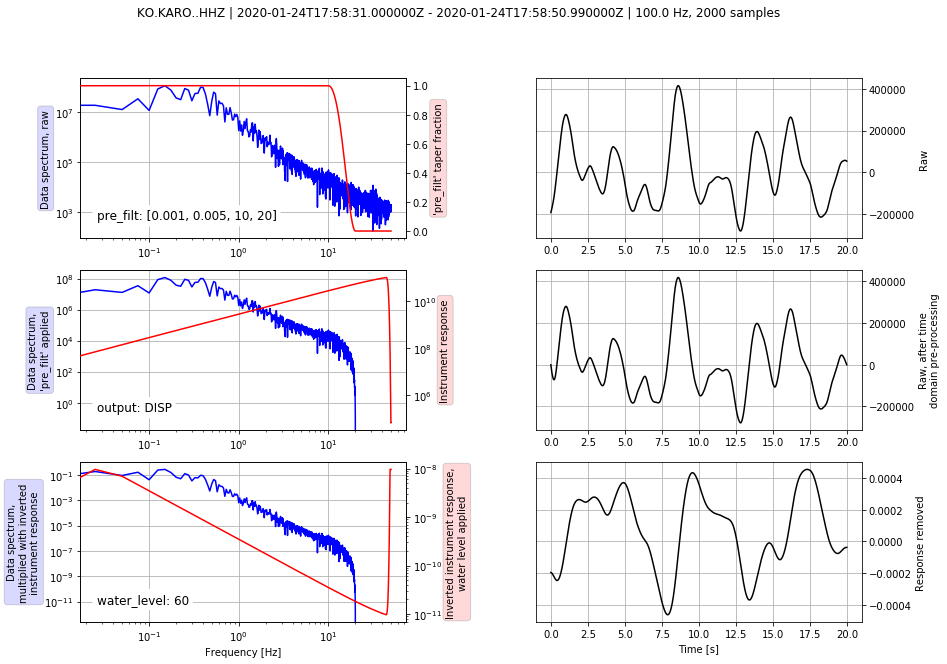

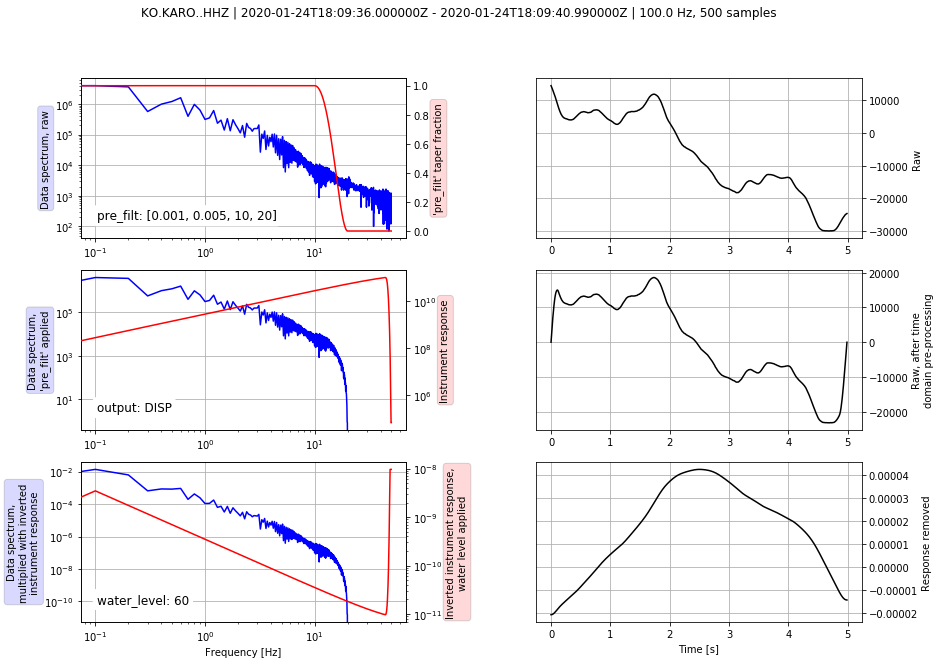

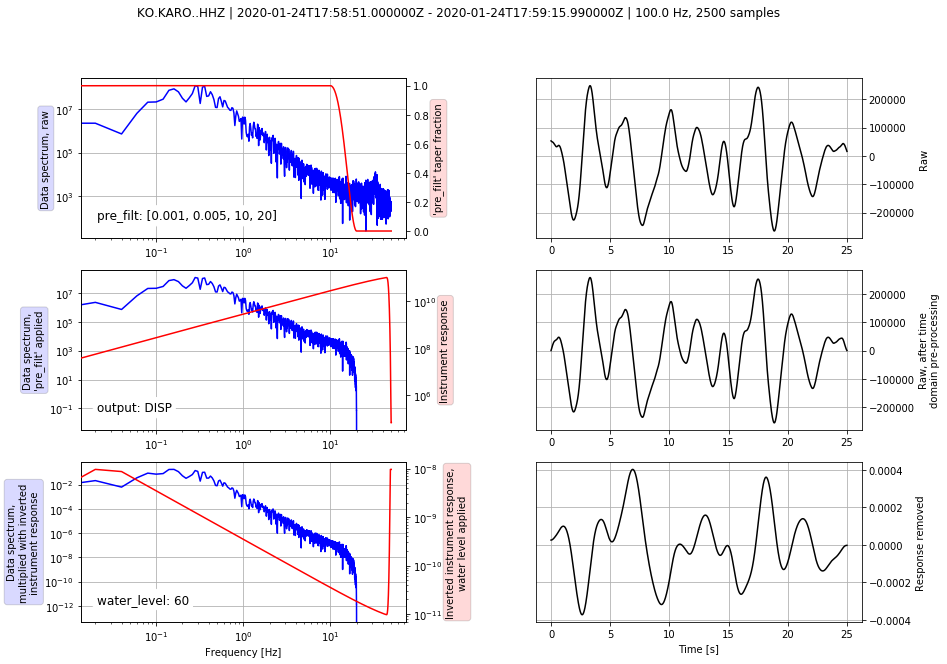

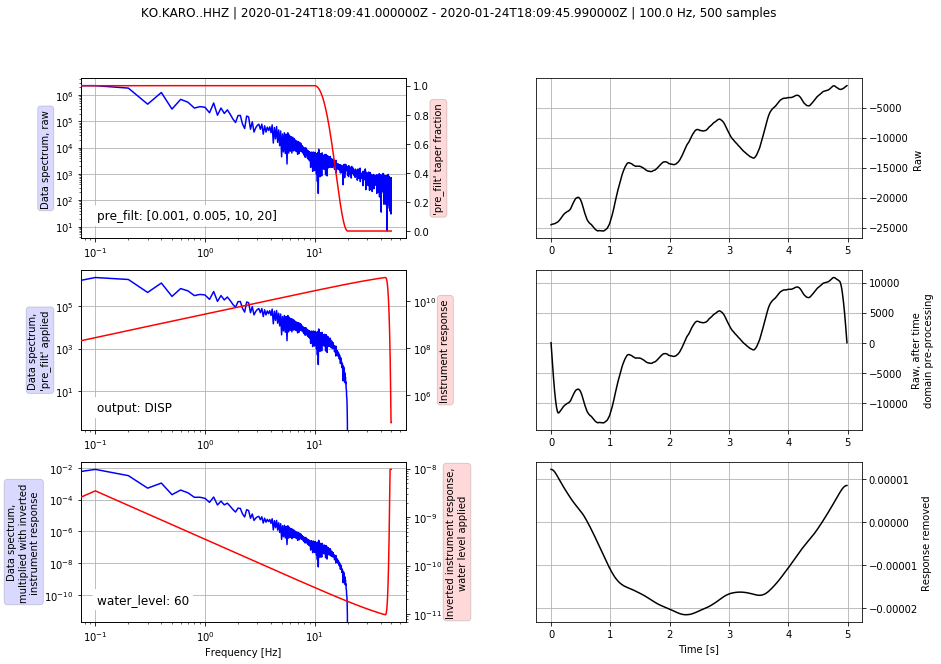

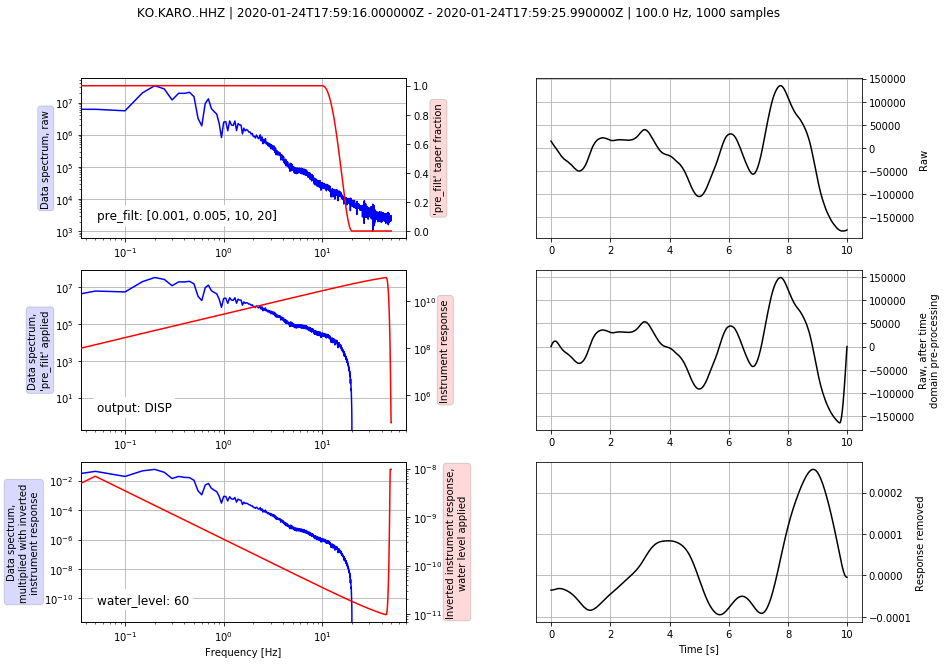

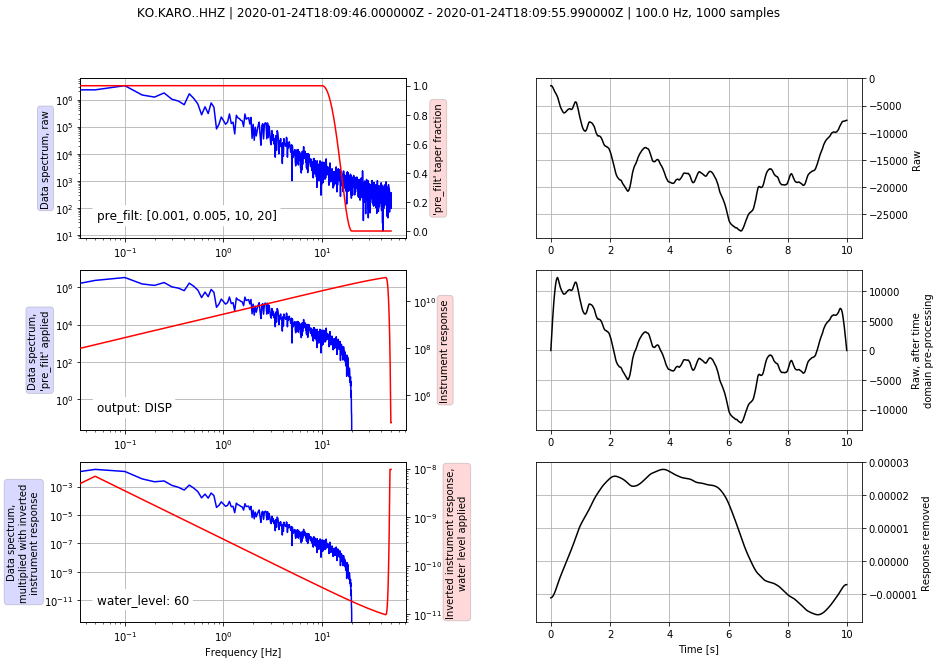

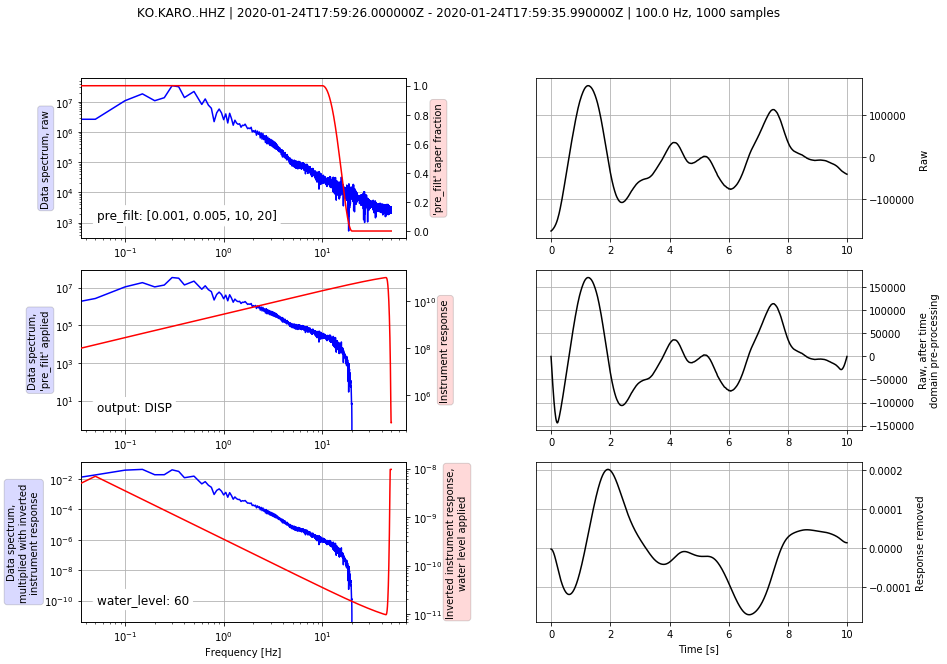

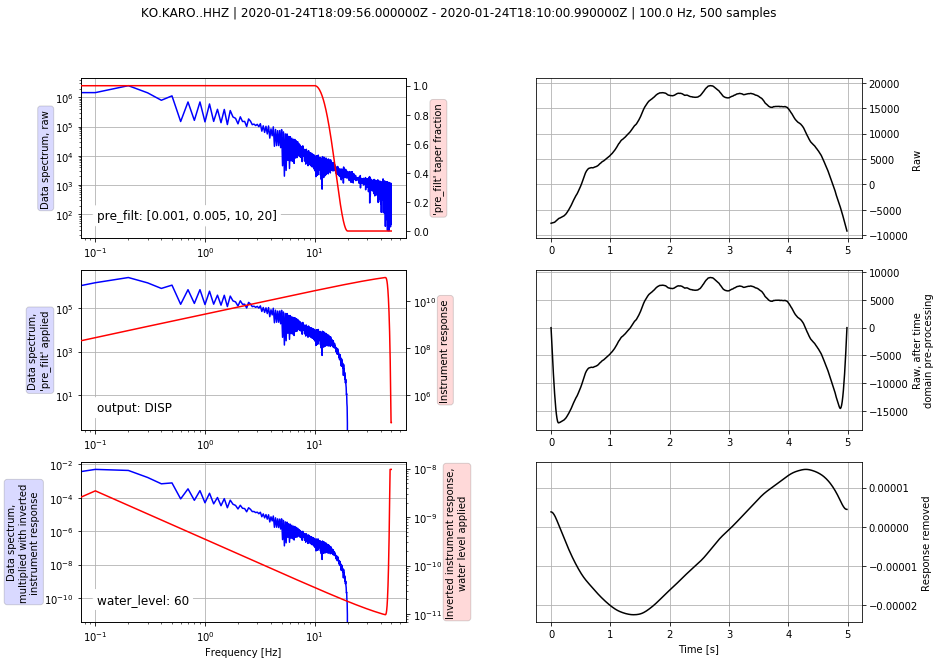

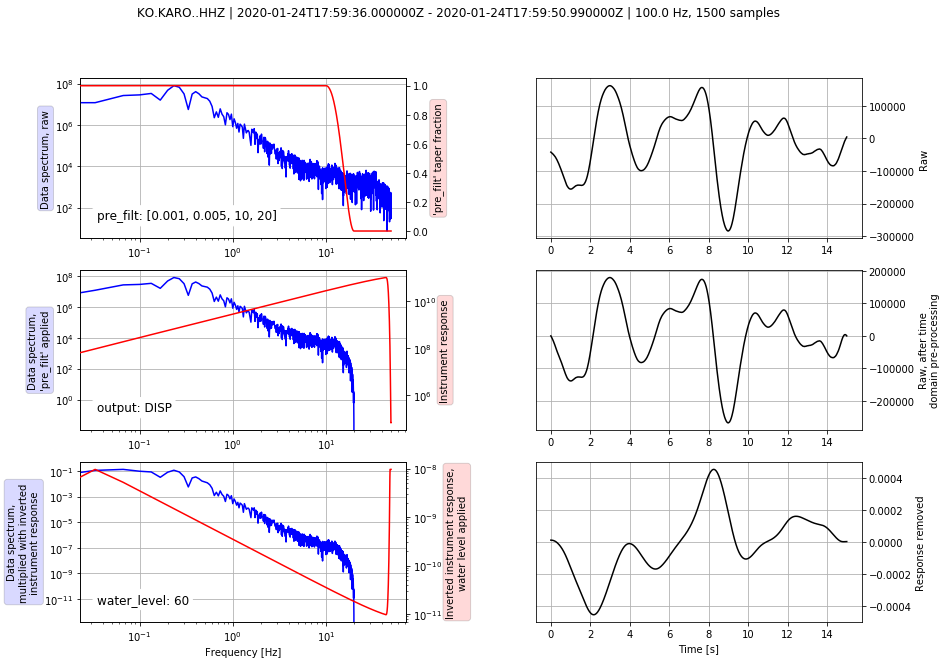

In [36]:
# Remove instrument response using the information from the given data (KO.KARO)
Bg_tr = Bg_st.select(component="Z").copy().remove_response(
    inventory=Bg_inv, output="DISP",pre_filt= pre_filt,taper= True
    water_level=60, plot=True)[0]

#### Please visit the below adress to have more information about remove_response function and its inputs
https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html

## V. Examples 

## Example 1) Lyon (France)

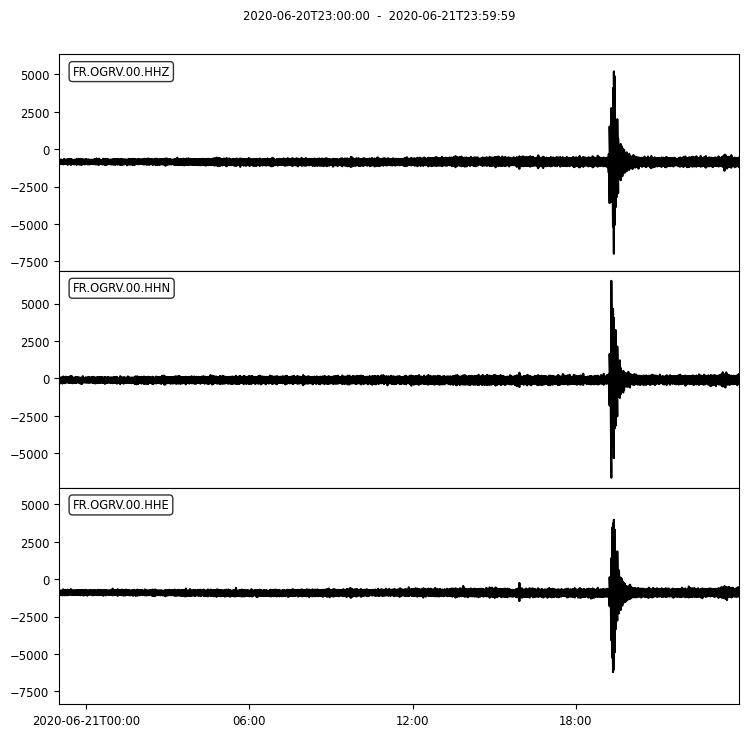

In [106]:
#of course we will read the waveform.
st1 = obspy.read('/Users/korayaydogan/Downloads/near_lyon.mseed')
st1.plot()
plt.show()
#non-filtered

In [107]:
tr1 = st1[0]
tr1.stats

         network: FR
         station: OGRV
        location: 00
         channel: HHE
       starttime: 2020-06-20T23:00:00.000000Z
         endtime: 2020-06-21T23:59:59.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8999901
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 2389, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 29339648})

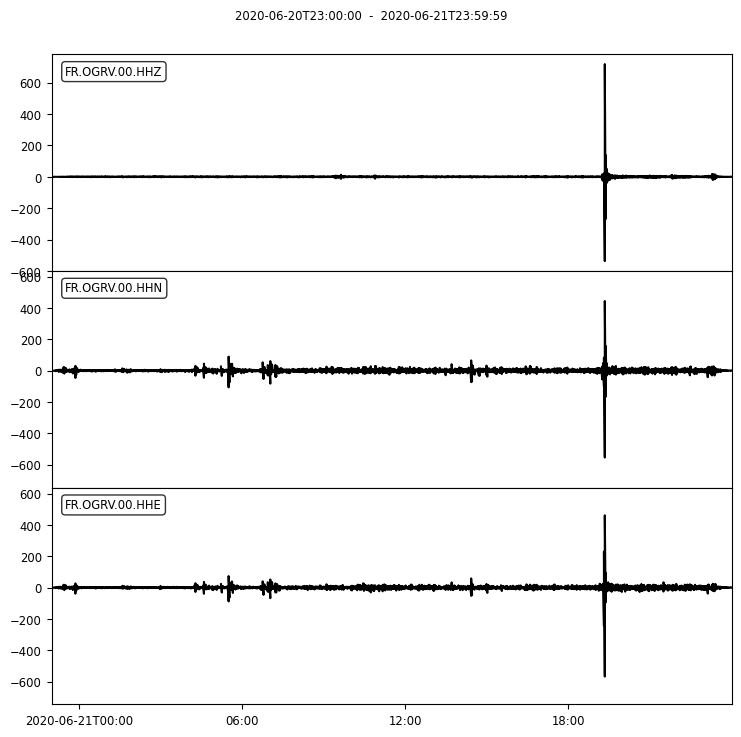

In [108]:
#filtered waveform
st1.slice(starttime = tr1.stats.starttime, endtime=tr1.stats.endtime).copy().taper(0.05).filter(
    "bandpass", freqmin=1.0 / 500.0, freqmax=1.0 / 50.0).plot()
plt.show()

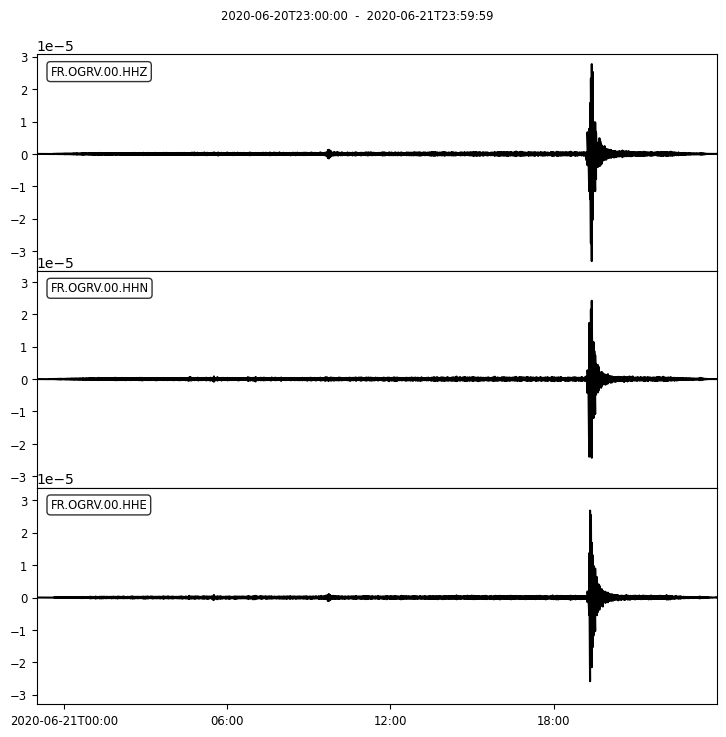

In [109]:
#as we did before, we will specify the metadata by using read_inventory
inv1 = obspy.read_inventory('/Users/korayaydogan/Downloads/near_lyonmeta.xml')

# the routine automatically picks the correct response for each trace
# define a filter band to prevent amplifying noise during the deconvolution

pre_filt = (0.005, 0.006, 30.0, 35.0)
#we can change the output type (ACC = acceleration , VEL = velocity, DISP = displacement)

st1.slice(starttime=tr1.stats.starttime,endtime=tr1.stats.endtime).copy().remove_response(
    inventory=inv1, output="DISP").taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

In [110]:
inv1

Inventory created at 2020-07-21T13:35:09.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://localhost:8080/fdsnws/station/1/query
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (1):
			FR
		Stations (1):
			FR.OGRV (La Roche-Vineuse - 71371 - Saône-et-Loire - Bourgogne-Franche-Comté - France)
		Channels (3):
			FR.OGRV.00.HHZ, FR.OGRV.00.HHN, FR.OGRV.00.HHE

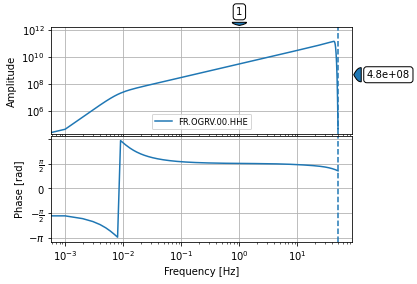

Displacement


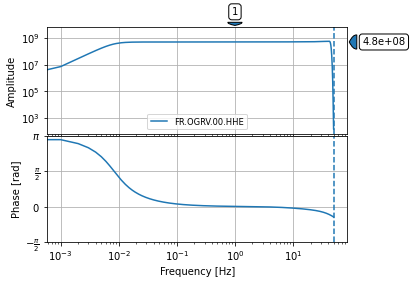

Velocity


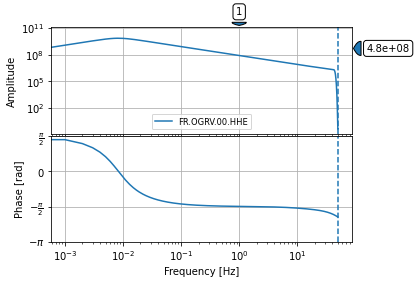

Accelereation


In [111]:
inv1.plot_response(0.001, channel = 'HHE', output = 'DISP')
print('Displacement') # unit is meter

inv1.plot_response(0.001, channel = 'HHE', output = 'VEL')
print('Velocity') #unit is meter per second

inv1.plot_response(0.001, channel = 'HHE', output = 'ACC')
print('Accelereation') #unit is meter per second squared

#you can change the channel name,as you can see at the above there are HNZ,HNE,HNN channel codes.

- *You can access further information with this link (https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html)*

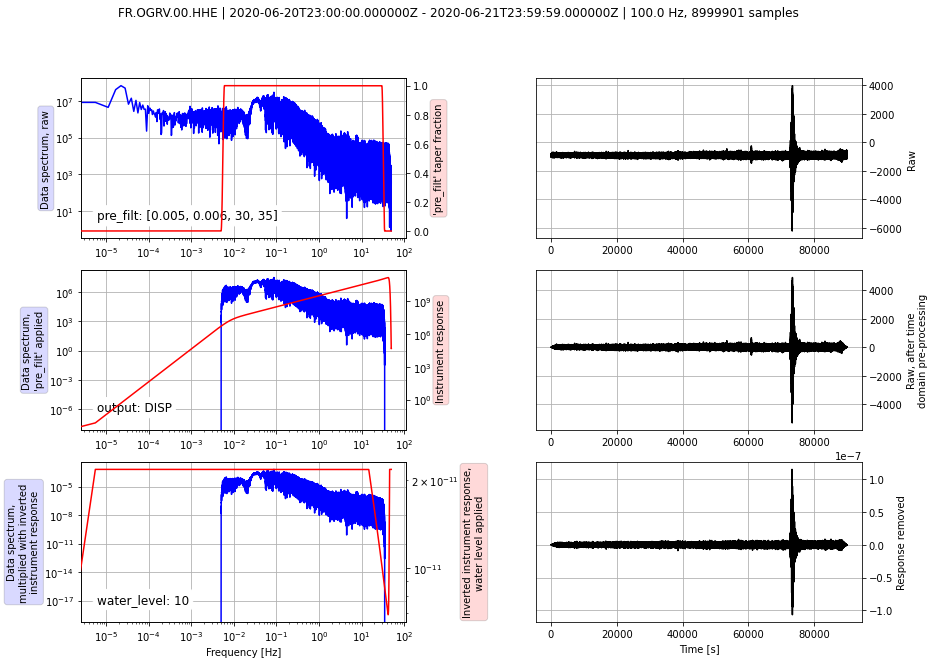

In [112]:
tr1 = st1.select(id="FR.OGRV.00.HHE").copy().remove_response(
inventory=inv1, output="DISP",pre_filt= pre_filt, water_level=10, plot=True)[0]

#we can specify some characteristics such as water level
#we specify the water level for deconvolution
#once you write plot=False, as can be guessed, the codes will not give us plot

- The distance between station and the center of earthquake is approximately 2264 km

## Example 2) Belgium and France border ( The same date)

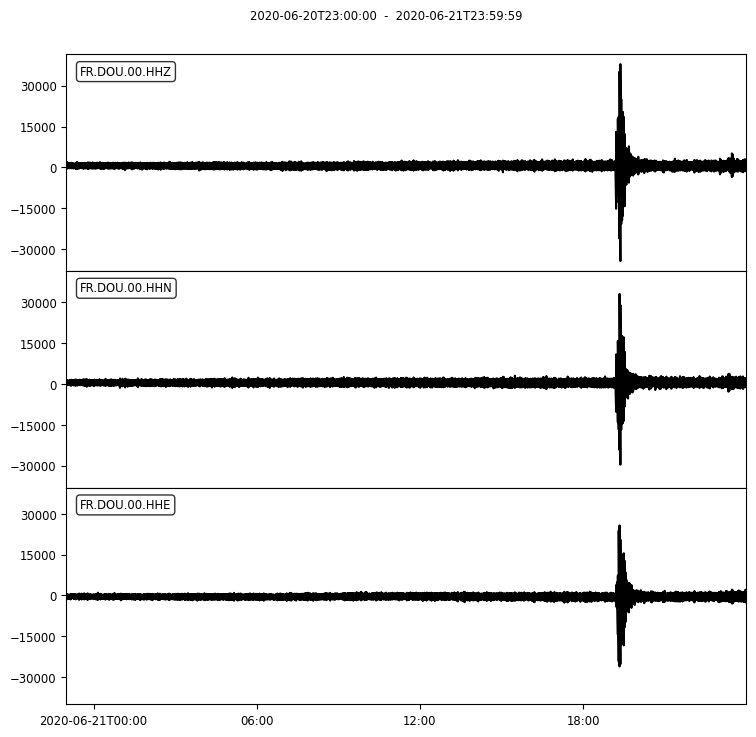

In [153]:
st2 = obspy.read('/Users/korayaydogan/Downloads/Belgium.mseed')
st2.plot()
plt.show()

In [154]:
tr2 = st2[0]
tr2.stats

         network: FR
         station: DOU
        location: 00
         channel: HHE
       starttime: 2020-06-20T23:00:00.000000Z
         endtime: 2020-06-21T23:59:59.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8999901
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 1947, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 23543808})

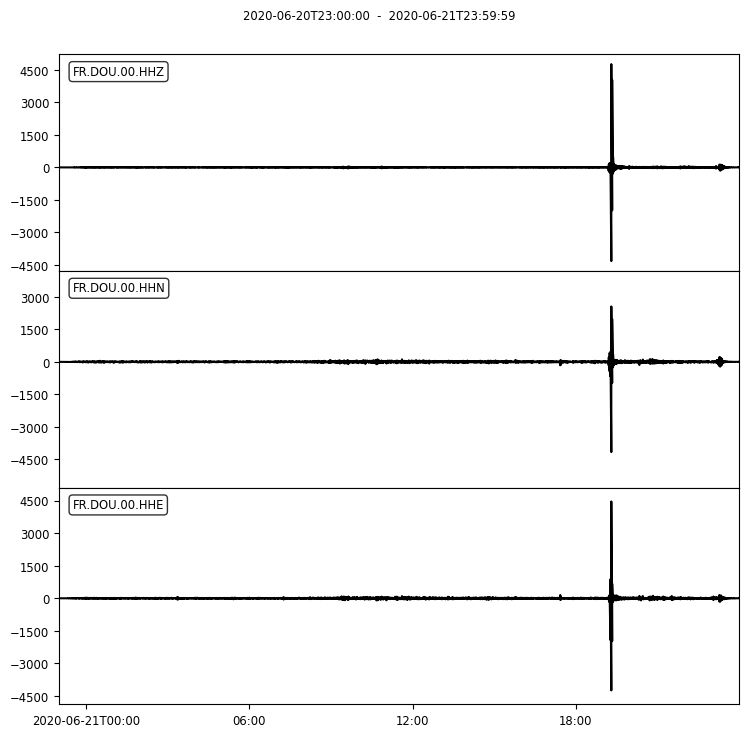

In [155]:
st2.slice(starttime = tr2.stats.starttime, endtime=tr2.stats.endtime).copy().taper(0.05).filter(
    "bandpass", freqmin=1.0 / 500.0, freqmax=1.0 / 50.0).plot()
plt.show()

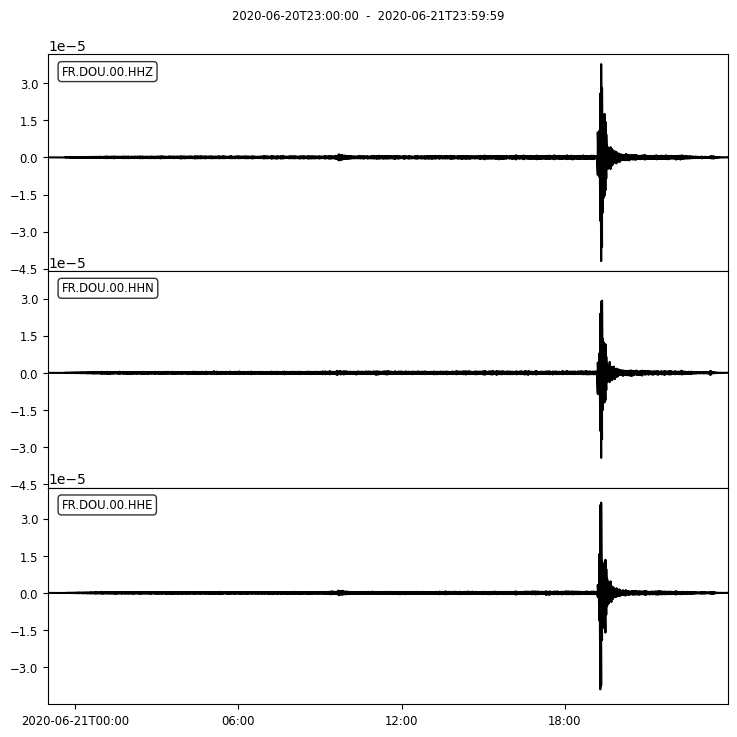

In [157]:
inv2 = obspy.read_inventory('/Users/korayaydogan/Downloads/Belgiummeta.xml')

pre_filt = (0.005, 0.006, 30.0, 35.0)

st2.slice(starttime=tr2.stats.starttime,endtime=tr2.stats.endtime).copy().remove_response(
    inventory=inv2, output="DISP").taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

In [158]:
inv2

Inventory created at 2020-07-21T13:47:04.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://localhost:8080/fdsnws/station/1/query
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (1):
			FR
		Stations (1):
			FR.DOU (Dourbes - Viroinval - Namur - Wallonie - Belgique)
		Channels (3):
			FR.DOU.00.HHZ, FR.DOU.00.HHN, FR.DOU.00.HHE

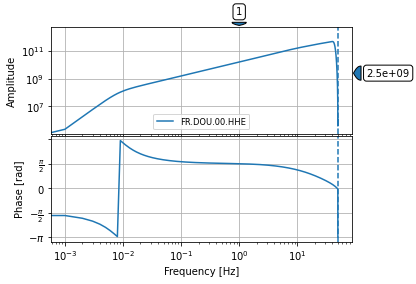

Displacement


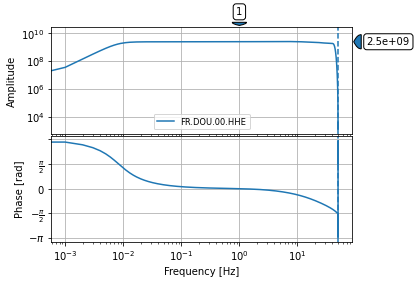

Velocity


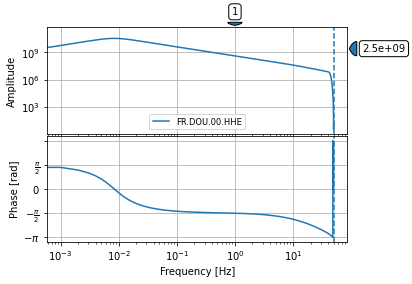

Accelereation


In [159]:
inv2.plot_response(0.001, channel = 'HHE', output = 'DISP')
print('Displacement') # unit is meter

inv2.plot_response(0.001, channel = 'HHE', output = 'VEL')
print('Velocity') #unit is meter per second

inv2.plot_response(0.001, channel = 'HHE', output = 'ACC')
print('Accelereation') #unit is meter per second squared

#you can change the channel name,as you can see at the above there are HNZ,HNE,HNN channel codes.

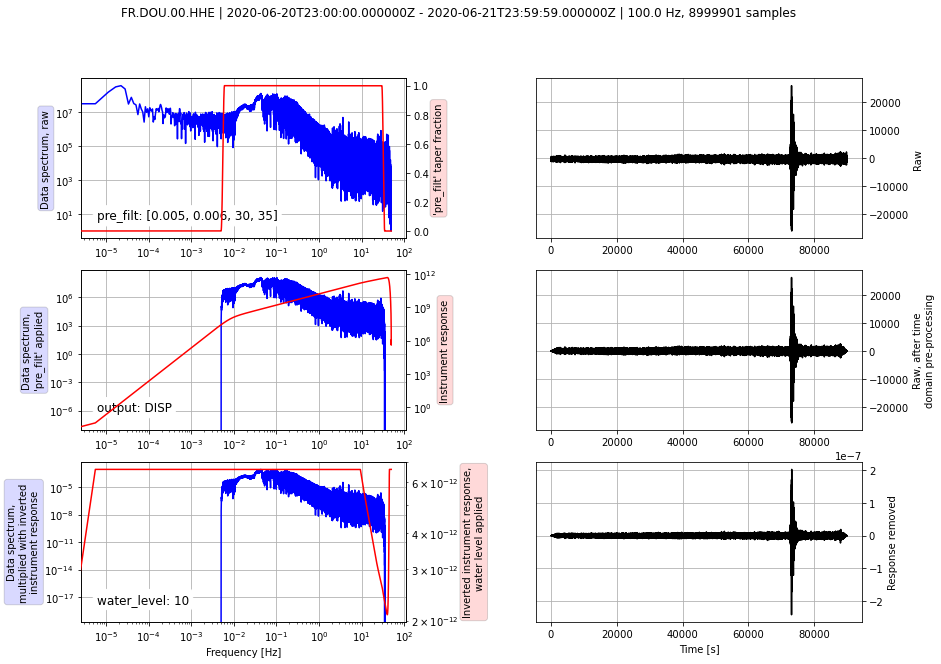

In [160]:
tr2 = st2.select(id="FR.DOU.00.HHE").copy().remove_response(
inventory=inv2, output="DISP",pre_filt= pre_filt, water_level=10, plot=True)[0]

- The distance is approximately 1636 km

- As you can see the above examples, we chose two different stations; the first one is near Lyon city and the second one is in Belgium. But, the earthquake (I can say earthquake since we filtered it) is happened at the same date. So, the form of the wave does not depend on the distance to where the event had happened(The earthquake occured near Iceland). They are so virtually the same.

## Example 3) Antalya (For Malatya Earthquake- 04.08.2020)

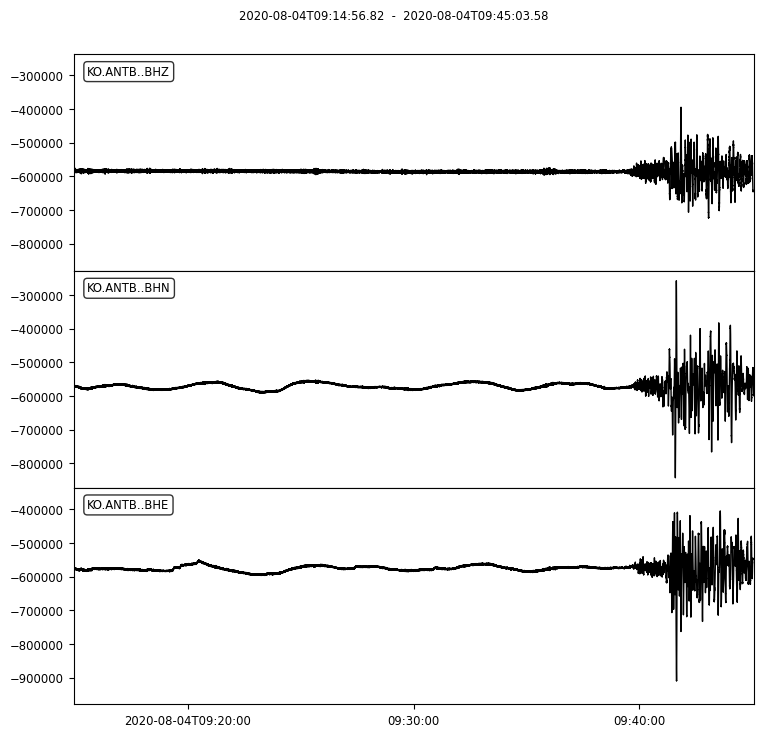

In [161]:
st3 = obspy.read('/Users/korayaydogan/Downloads/koantb.mseed')
st3.plot()
plt.show()

In [162]:
tr3 = st3[0]
tr3.stats

         network: KO
         station: ANTB
        location: 
         channel: BHE
       starttime: 2020-08-04T09:14:56.820000Z
         endtime: 2020-08-04T09:45:01.300000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 90225
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 429, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 662016})

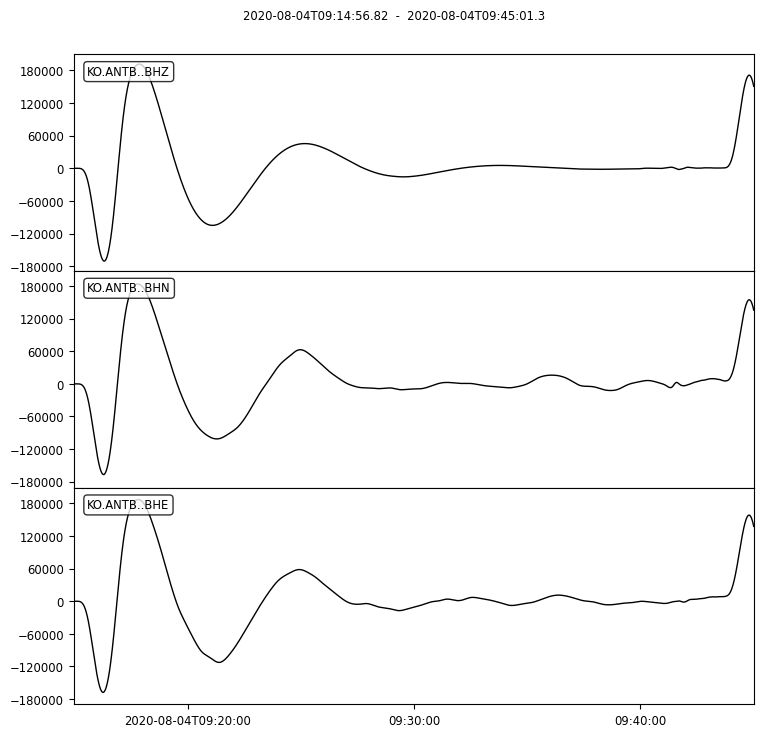

In [163]:
st3.slice(starttime= tr3.stats.starttime, endtime=tr3.stats.endtime).copy().taper(0.05).filter(
    "bandpass", freqmin=1.0 / 500.0, freqmax=1.0 / 50.0).plot()
plt.show()

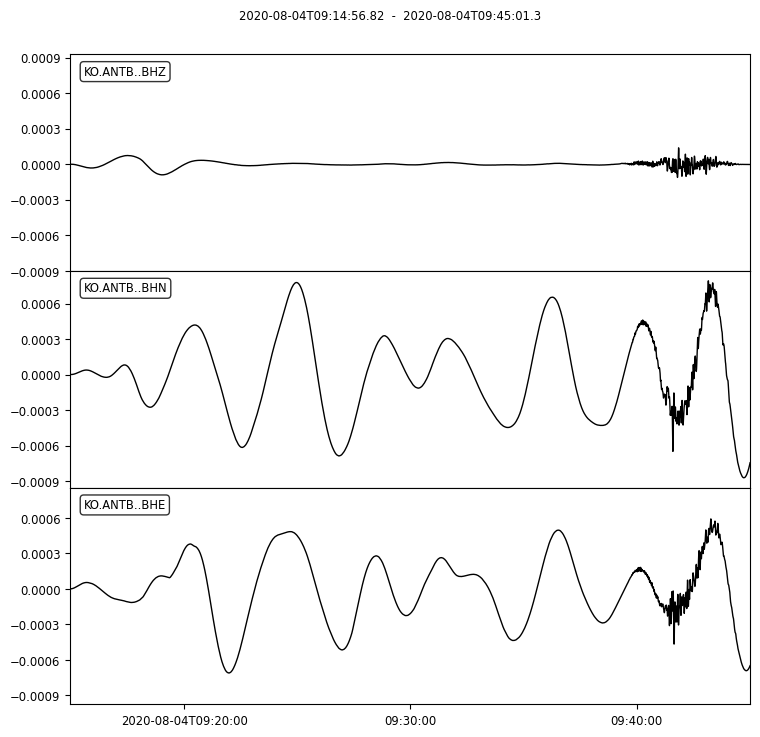

In [164]:
inv3 = obspy.read_inventory('/Users/korayaydogan/Downloads/koantb.xml')

pre_filt = (0.005, 0.006, 30.0, 35.0)

st3.slice(starttime=tr3.stats.starttime,endtime=tr3.stats.endtime).copy().remove_response(
    inventory=inv3, output="VEL").taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

In [165]:
inv3

Inventory created at 2020-08-16T13:20:16.258813Z
	Sending institution: SeisComP (KOERI)
	Contains:
		Networks (1):
			KO
		Stations (1):
			KO.ANTB (ANTALYA)
		Channels (3):
			KO.ANTB..BHZ, KO.ANTB..BHN, KO.ANTB..BHE

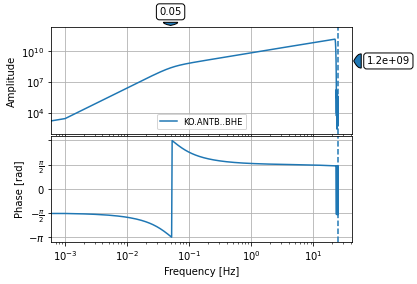

Displacement


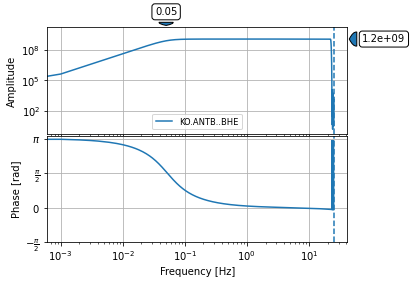

Velocity


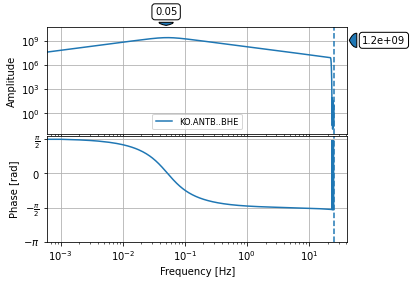

Accelereation


In [166]:
inv3.plot_response(0.001, channel = 'BHE', output = 'DISP')
print('Displacement') # unit is meter

inv3.plot_response(0.001, channel = 'BHE', output = 'VEL')
print('Velocity') #unit is meter per second

inv3.plot_response(0.001, channel = 'BHE', output = 'ACC')
print('Accelereation') #unit is meter per second squared

#you can change the channel name,as you can see at the above there are BHZ,BHE,BHN channel codes.

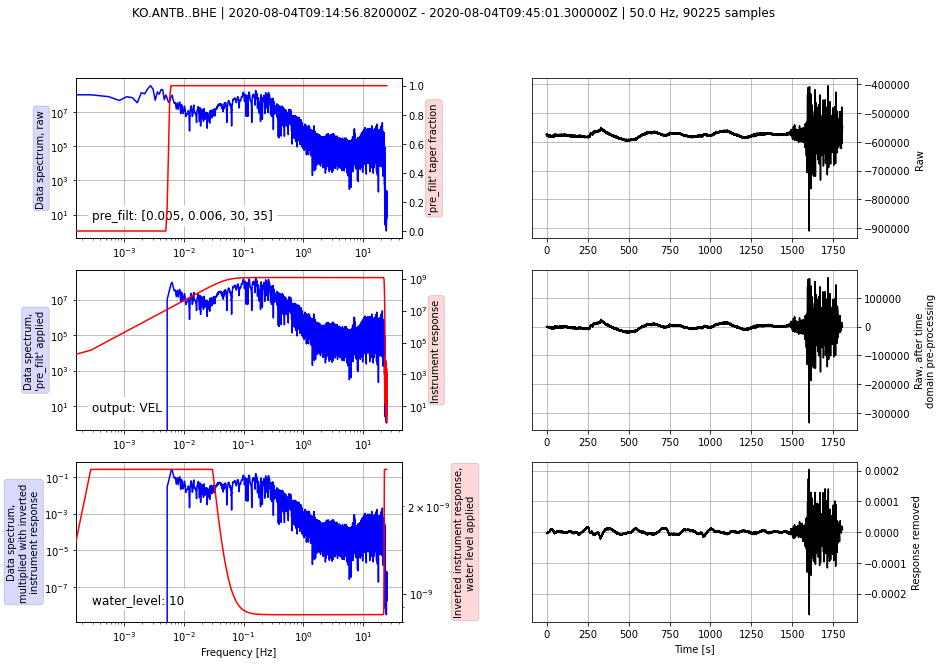

In [167]:
tr3 = st3.select(id="KO.ANTB..BHE").copy().remove_response(
inventory=inv3, output="VEL",pre_filt= pre_filt, water_level=10, plot=True)[0]

## Example 4)  Matera (Italy Again for The Same Earthquake)

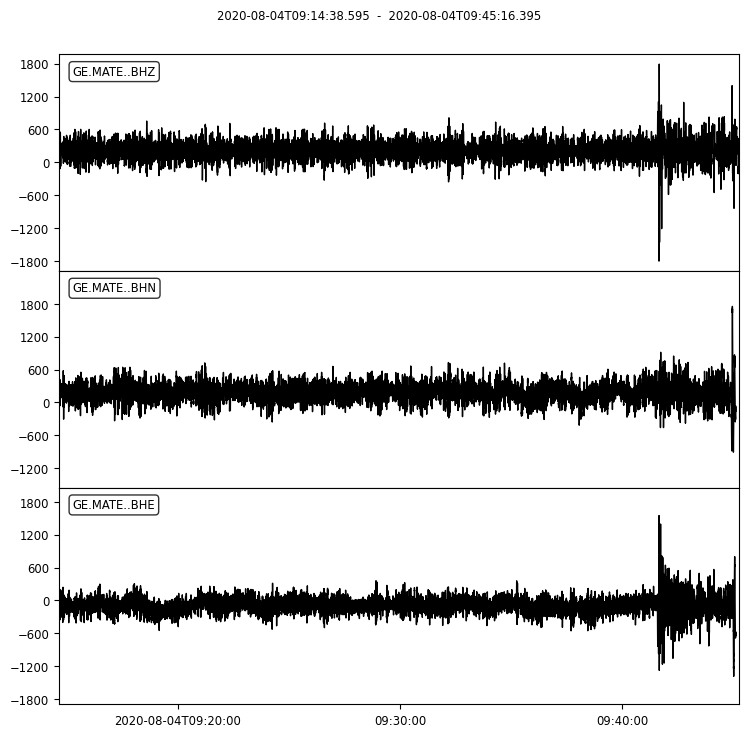

In [169]:
st4 = obspy.read('/Users/korayaydogan/Downloads/gemate.mseed')
st4.plot()
plt.show()

In [170]:
tr4 = st4[0]
tr4.stats

         network: GE
         station: MATE
        location: 
         channel: BHE
       starttime: 2020-08-04T09:14:40.445000Z
         endtime: 2020-08-04T09:45:07.395000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 36540
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 87, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 134144})

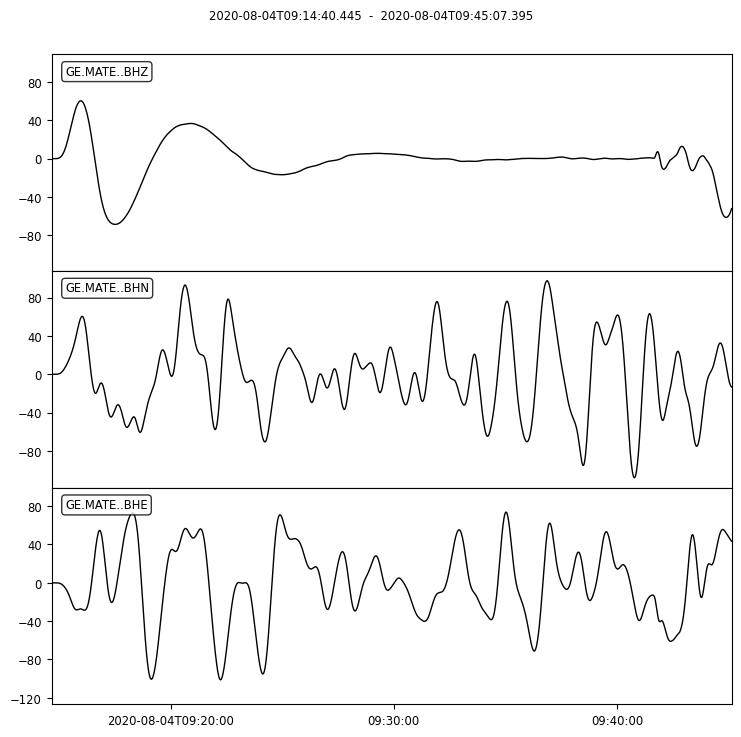

In [171]:
st4.slice(starttime= tr4.stats.starttime, endtime=tr4.stats.endtime).copy().taper(0.05).filter(
    "bandpass", freqmin=1.0 / 500.0, freqmax=1.0 / 50.0).plot()
plt.show()

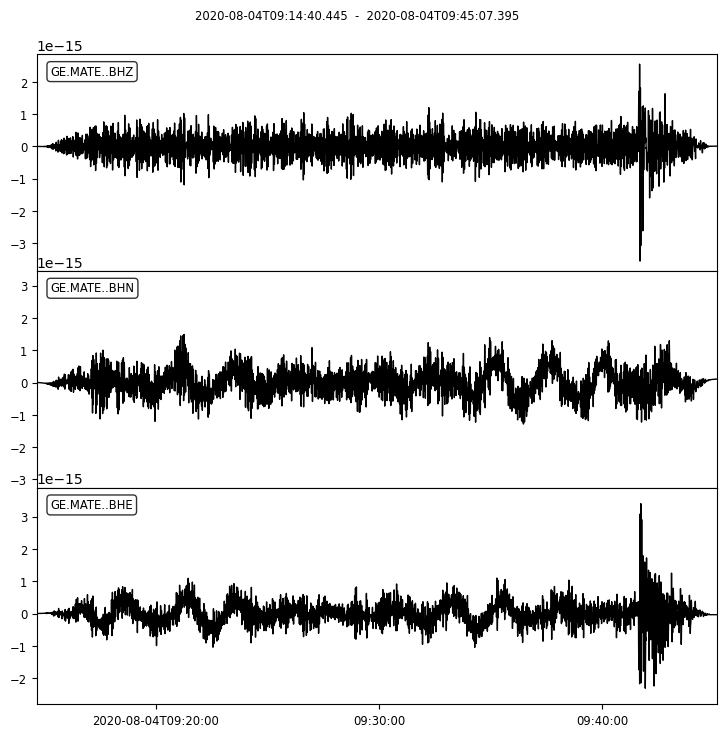

In [172]:
inv4 = obspy.read_inventory('/Users/korayaydogan/Downloads/gemate.xml')

pre_filt = (0.005, 0.006, 30.0, 35.0)
st4.remove_response(inventory=inv4, output='VEL', pre_filt=pre_filt)

st4.slice(starttime=tr4.stats.starttime,endtime=tr4.stats.endtime).copy().remove_response(
    inventory=inv4, output="VEL").taper(0.10,type="hann").filter(
    "bandpass", freqmin=1/200, freqmax=1/2).plot()
plt.show()

In [173]:
inv4

Inventory created at 2020-08-16T13:18:46.685584Z
	Sending institution: SeisComP (GFZ)
	Contains:
		Networks (1):
			GE
		Stations (1):
			GE.MATE (U Basilicata/GEOFON Station Matera, Italy)
		Channels (3):
			GE.MATE..BHZ, GE.MATE..BHN, GE.MATE..BHE

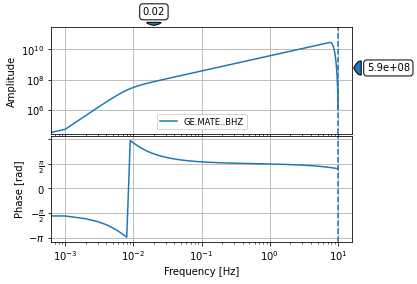

Displacement


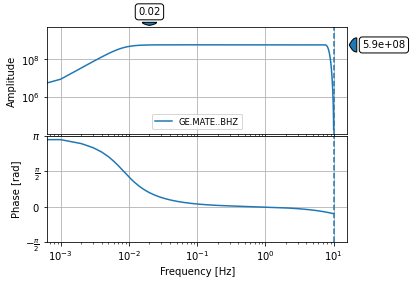

Velocity


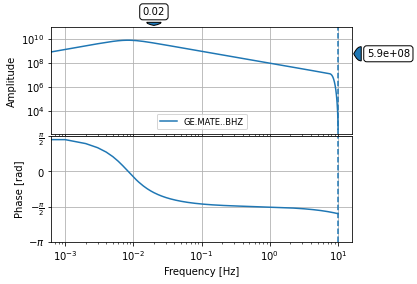

Accelereation


In [174]:
inv4.plot_response(0.001, channel = 'BHZ', output = 'DISP')
print('Displacement') # unit is meter

inv4.plot_response(0.001, channel = 'BHZ', output = 'VEL')
print('Velocity') #unit is meter per second

inv4.plot_response(0.001, channel = 'BHZ', output = 'ACC')
print('Accelereation') #unit is meter per second squared

#you can change the channel name,as you can see at the above there are BHZ,BHE,BHN channel codes.

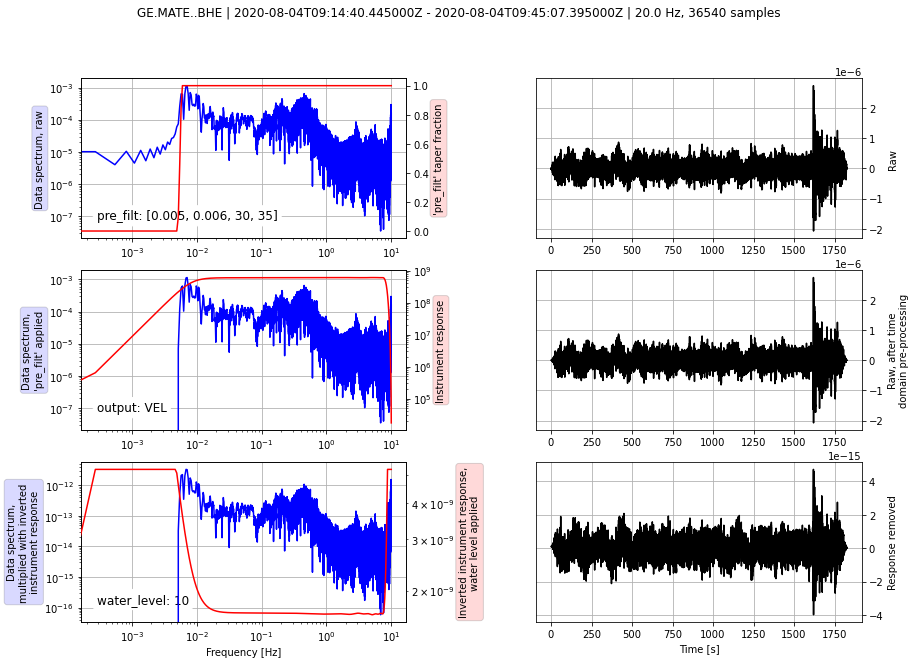

In [175]:
tr4 = st4.select(id="GE.MATE..BHE").copy().remove_response(
inventory=inv4, output="VEL",pre_filt= pre_filt, water_level=10, plot=True)[0]

- Again as you can see, the order of the magnitudes are similar, but not much as the previous example.

## Thanks :) Koray & Zeynep

## References: https://docs.obspy.org/tutorial/code_snippets/seismometer_correction_simulation.html https://krischer.github.io/seismo_live_build/html/General%20Seismology/instrument_response_wrapper.html